# Pump it Up Data Mining the Water Table

- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

### Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the training feature set
df_train_features = pd.read_csv('training_set_features.csv')

# Read the training label set
df_train_labels = pd.read_csv('training_set_labels.csv')

In [3]:
# Merge train and test data
df_train_merged = df_train_features.merge(df_train_labels, how='inner', on='id')

---
# Exploratory Data Analysis (EDA)

## 1. Overall Data Analysis

In [4]:
df_train_merged.shape

(59400, 41)

In [5]:
df_train_merged.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [6]:
df_train_merged.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [7]:
df_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [8]:
!pip install fast-ml

In [9]:
from fast_ml import eda
from fast_ml.utilities import display_all

summary_df = eda.df_info(df_train_features)
display_all(summary_df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
id,int64,Numerical,59400,"[69572, 8776, 34310, 67743, 19728, 9944, 19816...",0,0.0
amount_tsh,float64,Numerical,98,"[6000.0, 0.0, 25.0, 20.0, 200.0, 500.0, 50.0, ...",0,0.0
date_recorded,object,Categorical,356,"[2011-03-14, 2013-03-06, 2013-02-25, 2013-01-2...",0,0.0
funder,object,Categorical,1897,"[Roman, Grumeti, Lottery Club, Unicef, Action ...",3635,6.119529
gps_height,int64,Numerical,2428,"[1390, 1399, 686, 263, 0, 62, 1062, 1368, 1645...",0,0.0
installer,object,Categorical,2145,"[Roman, GRUMETI, World vision, UNICEF, Artisan...",3655,6.153199
longitude,float64,Numerical,57516,"[34.93809275, 34.6987661, 37.46066446, 38.4861...",0,0.0
latitude,float64,Numerical,57517,"[-9.85632177, -2.14746569, -3.82132853, -11.15...",0,0.0
wpt_name,object,Categorical,37400,"[none, Zahanati, Kwa Mahundi, Zahanati Ya Nany...",0,0.0
num_private,int64,Numerical,65,"[0, 39, 5, 45, 6, 3, 698, 32, 15, 7]",0,0.0


### 1.1 Missing Data

In [10]:
# Missing Data in descending order
df_train_merged.isnull().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
payment                      0
waterpoint_type_group        0
extraction_type_group        0
extraction_type_class        0
waterpoint_type              0
management                   0
management_group             0
source_class                 0
source_type                  0
water_quality                0
quality_group                0
extraction_type              0
quantity                     0
quantity_group               0
source                       0
payment_type                 0
id                           0
construction_year            0
basin                        0
date_recorded                0
gps_height                   0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
region  

### 1.2 Observation on Target labels

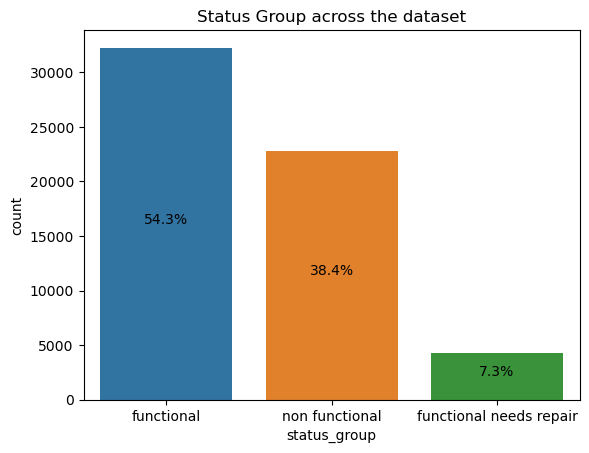

In [11]:
# Overall target values
# Imbalanced dataset
target_countplot = sns.countplot(data=df_train_merged, x='status_group')
total = df_train_merged.shape[0]

for patch in target_countplot.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height() / 2
    target_countplot.annotate(percentage, (x, y), ha='center')
    
plt.title('Status Group across the dataset')
plt.show()

### 1.3 Duplicate Data

In [12]:
# Check for duplicate rows
df_train_merged[df_train_merged.duplicated(keep=False)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


## 2. Feature Analysis

### 2.1 Amount_tsh

In [13]:
# Display the column's descriptive statistic
df_train_merged['amount_tsh'].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [14]:
# Display the total number of NaN values in the column
print('Number of NaN value:', df_train_merged['amount_tsh'].isna().sum())

# Display the length of unique value
print('Number of unique values in the column:', len(df_train_merged['amount_tsh'].unique()))

print('Percentage of column values with 0:', df_train_merged.loc[df_train_merged['amount_tsh'] == 0].shape[0] / df_train_merged.shape[0])

Number of NaN value: 0
Number of unique values in the column: 98
Percentage of column values with 0: 0.700993265993266


In [15]:
# Lets check the target variable of the column value 0
df_train_merged.loc[df_train_merged['amount_tsh'] == 0, 'status_group']

1            functional
3        non functional
4            functional
6        non functional
7        non functional
              ...      
59392    non functional
59393        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 41639, dtype: object

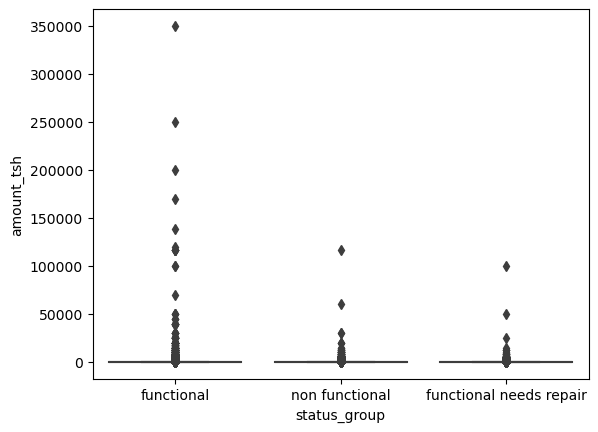

In [16]:
sns.boxplot(data=df_train_merged, x='status_group', y='amount_tsh')
plt.show()

#### Observation:
- 70% of the column values contains 0 as their amount_tsh.
- We may presume that a portion of the column values is missing and encoded as 0 since a waterpoint can't be functional with the value of 0 on amount_tsh.
- Outliers exist in the data e.g. 350000.
#### Actions:
- Drop the colummn.

### 2.2 Date Recorded

In [17]:
# Display the total number of NaN values in the column
print('Number of NaN value:', df_train_merged['date_recorded'].isna().sum())

Number of NaN value: 0


### 2.3 Funder

In [18]:
df_train_merged['funder'].describe()

count                      55765
unique                      1897
top       Government Of Tanzania
freq                        9084
Name: funder, dtype: object

In [19]:
# Display the total number of NaN values in the column
print('Number of NaN value:', df_train_merged['funder'].isna().sum())

Number of NaN value: 3635


In [20]:
# Check for spelling mistakes or possible empty values
print(list(df_train_merged['funder'].sort_values().unique()))

['0', 'A/co Germany', 'Aar', 'Abas Ka', 'Abasia', 'Abc-ihushi Development Cent', 'Abd', 'Abdala', 'Abddwe', 'Abdul', 'Abood', 'Abs', 'Aco/germany', 'Acord', 'Acord Ngo', 'Acra', 'Act', 'Act Mara', 'Action Aid', 'Action Contre La Faim', 'Action In A', 'Adap', 'Adb', 'Adf', 'Adp', 'Adp Bungu', 'Adp Mombo', 'Adp/w', 'Adra', 'Af', 'Afdp', 'Afric', 'Africa', 'Africa 2000 Network/undp', 'Africa Amini Alama', 'Africa Project Ev Germany', 'African', 'African 2000 Network', 'African Barrick Gold', 'African Development Bank', 'African Development Foundation', 'African Muslim Agency', 'African Realief Committe Of Ku', 'African Reflections Foundation', 'African Relie', 'Africaone Ltd', 'Africare', 'Afriican Reli', 'Afroz Ismail', 'Afya Department Lindi Rural', 'Agape Churc', 'Agt Church', 'Ahmadia', 'Ai', 'Aic', 'Aic Church', 'Aic Kij', 'Aict', 'Aimgold', 'Aixos', 'Alia', 'Ambwene Mwaikek', 'Amref', 'Amrefe', 'Anglican Church', 'Angrikana', 'Anjuman E Seifee', 'Answeer Muslim Grou', 'Apm', 'Apm[af

In [21]:
print('Number of rows with 0 as funder value:', len(df_train_merged.loc[df_train_merged['funder'] == '0']))
print('Number of rows with None as funder value:', len(df_train_merged.loc[df_train_merged['funder'] == 'None']))
print('Number of rows with nan as funder value:', len(df_train_merged.loc[df_train_merged['funder'] == np.nan]))

Number of rows with 0 as funder value: 777
Number of rows with None as funder value: 2
Number of rows with nan as funder value: 0


In [22]:
df_train_merged['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Cpps Mission                 1
Inkinda                      1
Yasini Selemani              1
Kauzeni                      1
Cefa/rcchurch                1
Name: funder, Length: 1897, dtype: int64

#### Observation:
- Funder consist of 1897 unique values.
- 777 rows contains 0, 2 None as Funder values.
- High cardinality is present in the Funder column, necessitating extra preprocessing steps before ordinal encoding steps.
#### Actions:
- Imputation, encoding.

### 2.4 Gps_height (Altitude of the well)

In [23]:
df_train_merged['gps_height'].describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

In [24]:
# Display the total number of NaN values in the column
print('Number of NaN value:', df_train_merged['gps_height'].isna().sum())

print('Percentage of values of 0: ', df_train_merged.loc[df_train_merged['gps_height'] == 0].shape[0] / df_train_merged.shape[0])

Number of NaN value: 0
Percentage of values of 0:  0.3440740740740741


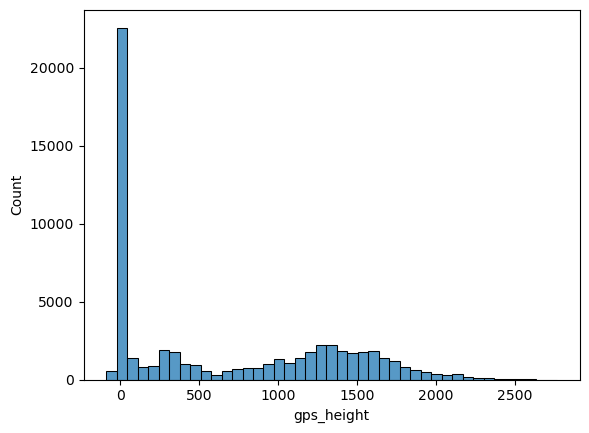

In [25]:
sns.histplot(data=df_train_merged, x='gps_height')
plt.show()

#### Observation
- 34% of the values are 0, therefore it is likely that missing values are encoded as 0.
#### Actions:
- Imputation.

### 2.5 Installer

In [26]:
df_train_merged['installer'].describe()

count     55745
unique     2145
top         DWE
freq      17402
Name: installer, dtype: object

In [27]:
# Display the total number of NaN values in the coloumn
print('Number of NaN value:', df_train_merged['installer'].isna().sum())

Number of NaN value: 3655


In [28]:
print(df_train_merged['installer'].value_counts(normalize=True))

DWE                        0.312171
Government                 0.032738
RWE                        0.021634
Commu                      0.019015
DANIDA                     0.018836
                             ...   
Africa M                   0.000018
WDE                        0.000018
hesaw                      0.000018
Yasini Selemani            0.000018
HOTELS AND LOGGS TZ LTD    0.000018
Name: installer, Length: 2145, dtype: float64


In [29]:
print(list(df_train_merged['installer'].sort_values().unique()))

['-', '0', 'A.D.B', 'AAR', 'ABASIA', 'ABD', 'ABDALA', 'ABDUL', 'AC', 'ACORD', 'ACRA', 'ACT', 'ACT MARA', 'ACTION AID', 'ACTIVE TANK CO', 'ACTIVE TANK CO LTD', 'AD', 'ADAP', 'ADB', 'ADP', 'ADP Busangi', 'ADRA', 'ADRA /Government', 'ADRA/Government', 'AF', 'AFRICA', 'AFRICA MUSLIM', 'AFRICAN DEVELOPMENT FOUNDATION', 'AFRICAN REFLECTIONS FOUNDATION', 'AGRICAN', 'AI', 'AIC', 'AIC KI', 'AICT', 'AIMGOLD', 'AIXOS', 'ALIA', 'ALLYS', 'AMP Contract', 'AMP Contracts', 'AMP contractor', 'AMREF', 'ANGLI', 'ANGLIKANA CHURCH', 'ANGRIKANA', 'ANSWAR', 'APM', 'AQAL', 'AQUA BLUES ANGELS', 'AQUA WEL', 'AQUA Wat', 'AQUA Wel', 'AQUARMAN DRILLERS', 'ASDP', 'ATIGH BUILDINGS', 'AUSTRALIA', 'AUWASA', 'Aartisa', 'Abdallah Ally Wazir', 'Accra', 'Action Aid', 'Action Contre La Faim', 'Action Contre la Faim', 'Active KMK', 'Active MKM', 'Adam', 'Adam Kea', 'Adam mualuaka', 'Adra', 'Adra /Community', 'Adra/ Community', 'Adra/Community', 'Adrs', 'Af', 'Africa', 'Africa Amini Alama', 'Africa Islamic Agency Tanzania', 

#### Observation:
- Installer consist of 2145 unique values, high cardinality.
- 31% of the values are DWE as installer.
- Contains spelling mistakes e.g. ADB, A.D.B

#### Actions:
- Imputation, encoding.

### 2.6 Latitude & Longitude

In [30]:
# Display the total number of NaN values in the column
print('Number of NaN value (Latitude):', df_train_merged['latitude'].isna().sum())
print('Number of NaN value (Longitude):', df_train_merged['longitude'].isna().sum())

Number of NaN value (Latitude): 0
Number of NaN value (Longitude): 0


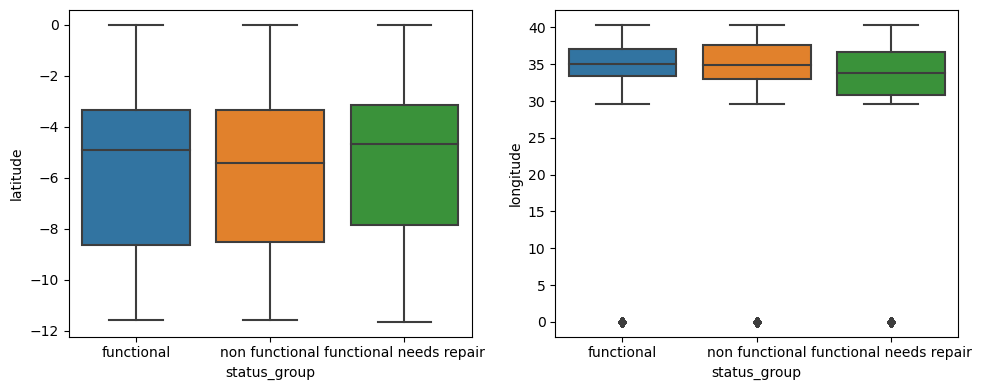

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=df_train_merged, x='status_group', y='latitude', ax=ax[0])
sns.boxplot(data=df_train_merged, x='status_group', y='longitude', ax=ax[1])
plt.tight_layout()
plt.show()

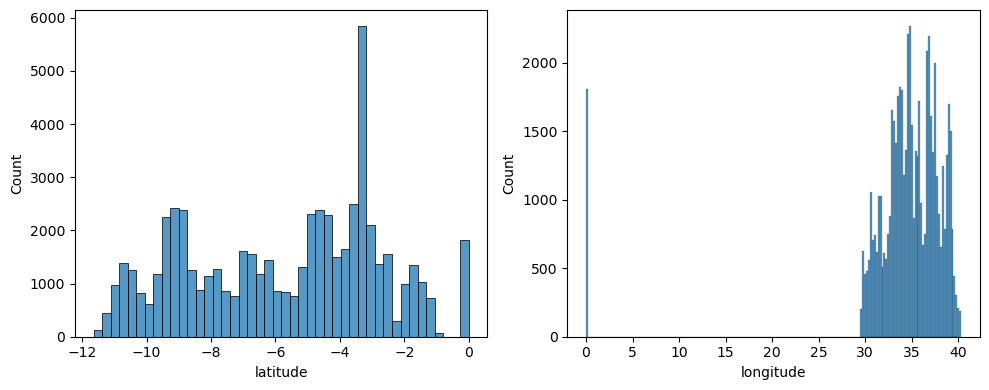

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=df_train_merged, x='latitude', ax=ax[0])
sns.histplot(data=df_train_merged, x='longitude', ax=ax[1])
plt.tight_layout()
plt.show()

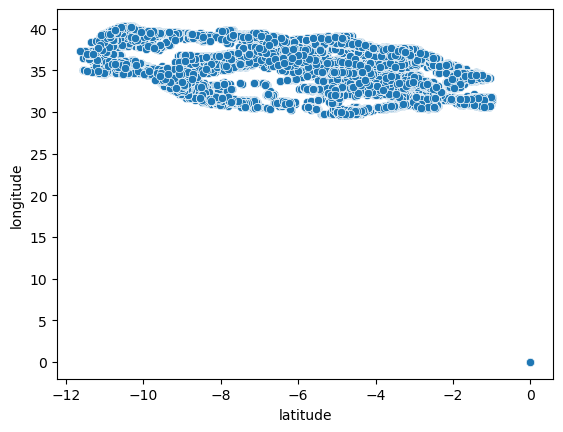

In [33]:
sns.scatterplot(data=df_train_merged, x='latitude', y='longitude')
plt.show()

#### Observation:
- Missing values in longitude are encoded as 0.

#### Actions:
- Remove or encode the value 0 for latitude & longitude.

### 2.7 Wpt_name

In [34]:
# Display the total number of NaN values in the column
print('Number of NaN value:', df_train_merged['wpt_name'].isna().sum())

# Display the length of unique values
print('Length of unique values: ', len(df_train_merged['wpt_name'].unique()))

# Check for spelling mistakes or possible empty values
print(list(df_train_merged['funder'].sort_values().unique()))

Number of NaN value: 0
Length of unique values:  37400
['0', 'A/co Germany', 'Aar', 'Abas Ka', 'Abasia', 'Abc-ihushi Development Cent', 'Abd', 'Abdala', 'Abddwe', 'Abdul', 'Abood', 'Abs', 'Aco/germany', 'Acord', 'Acord Ngo', 'Acra', 'Act', 'Act Mara', 'Action Aid', 'Action Contre La Faim', 'Action In A', 'Adap', 'Adb', 'Adf', 'Adp', 'Adp Bungu', 'Adp Mombo', 'Adp/w', 'Adra', 'Af', 'Afdp', 'Afric', 'Africa', 'Africa 2000 Network/undp', 'Africa Amini Alama', 'Africa Project Ev Germany', 'African', 'African 2000 Network', 'African Barrick Gold', 'African Development Bank', 'African Development Foundation', 'African Muslim Agency', 'African Realief Committe Of Ku', 'African Reflections Foundation', 'African Relie', 'Africaone Ltd', 'Africare', 'Afriican Reli', 'Afroz Ismail', 'Afya Department Lindi Rural', 'Agape Churc', 'Agt Church', 'Ahmadia', 'Ai', 'Aic', 'Aic Church', 'Aic Kij', 'Aict', 'Aimgold', 'Aixos', 'Alia', 'Ambwene Mwaikek', 'Amref', 'Amrefe', 'Anglican Church', 'Angrikana', 'A

In [35]:
print('Number of rows with 0 as wpt_name value:', len(df_train_merged.loc[df_train_merged['wpt_name'] == '0']))
print('Number of rows with None as wpt_name value:', len(df_train_merged.loc[df_train_merged['wpt_name'] == 'none']))
print('Number of rows with nan as wpt_name value:', len(df_train_merged.loc[df_train_merged['wpt_name'] == np.nan]))

Number of rows with 0 as wpt_name value: 0
Number of rows with None as wpt_name value: 3563
Number of rows with nan as wpt_name value: 0


In [36]:
df_train_merged['wpt_name'].value_counts()

none                   3563
Shuleni                1748
Zahanati                830
Msikitini               535
Kanisani                323
                       ... 
Kwa Sebulu                1
Malezi 3                  1
Dauzeni Kalawo            1
Kwa Boniphace Mbuya       1
Mwamagoko                 1
Name: wpt_name, Length: 37400, dtype: int64

#### Observation:
- A total of 37400 unique values, high cardinality and difficult to encode
- The highest instances of name contains 'none', which can be consider as missing values

#### Actions:
- It is reasonable to drop wpt_name feature.

In [37]:
df_train_merged['num_private'].describe()

count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64

In [38]:
print('Number of missing values:', df_train_merged['num_private'].isna().sum())

Number of missing values: 0


In [39]:
print('Percentage of values as 0:', df_train_merged.loc[df_train_merged['num_private'] == 0, 'num_private'].count() / df_train_merged.shape[0])

Percentage of values as 0: 0.9872558922558923


- Approximate 99% of the data is 0.

Actions:
- It is reasonable to drop num_private feature.

### 2.8 Basin

In [40]:
df_train_merged['basin'].describe()

count             59400
unique                9
top       Lake Victoria
freq              10248
Name: basin, dtype: object

In [41]:
print('Number of NaN value:', df_train_merged['basin'].isna().sum())

Number of NaN value: 0


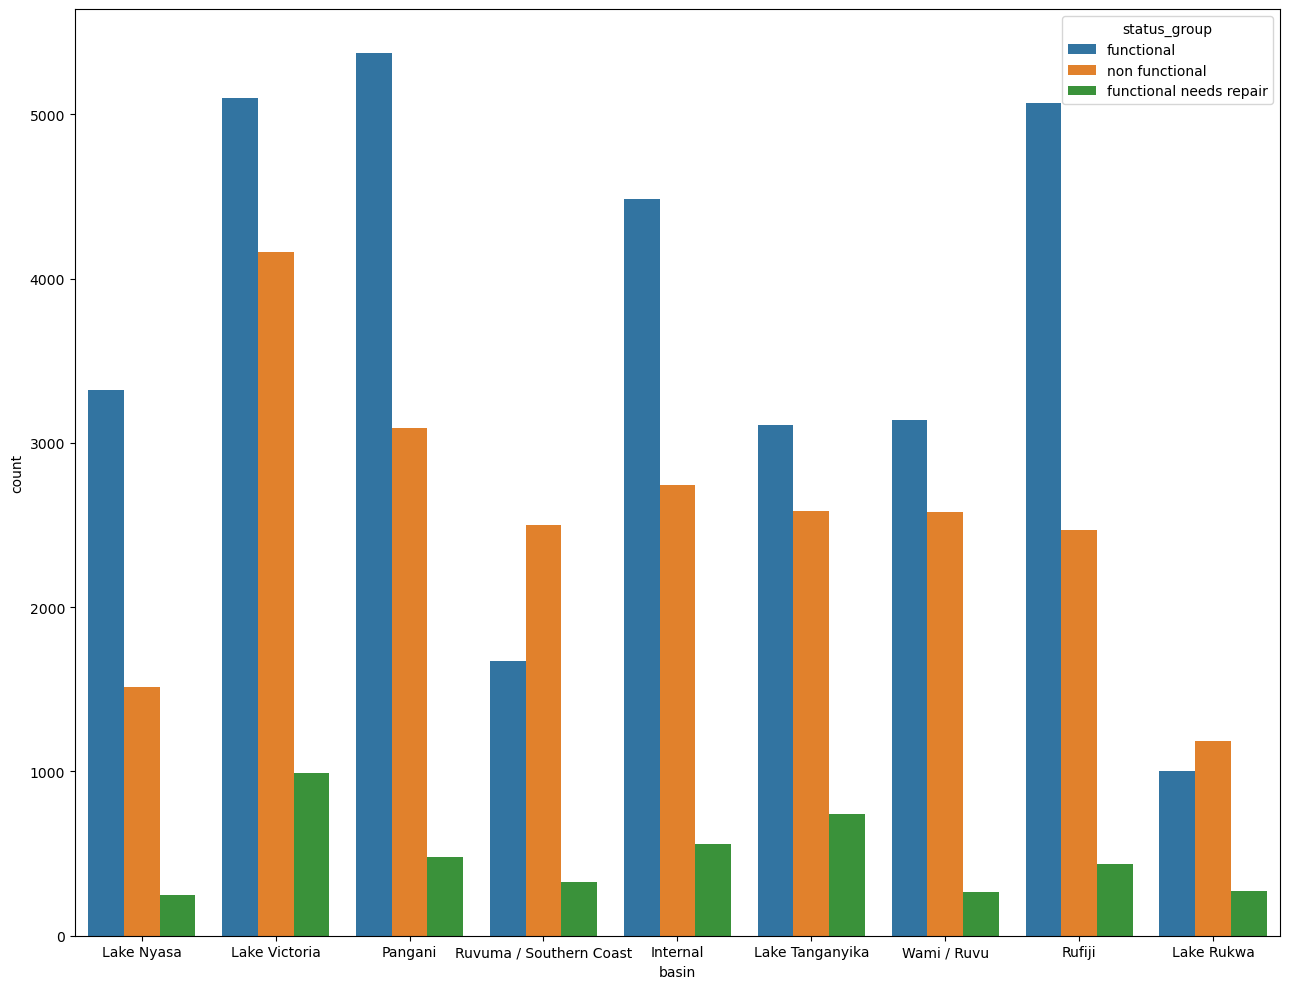

In [42]:
fig, ax = plt.subplots(figsize=(13, 10))
sns.countplot(data=df_train_merged, x='basin', hue='status_group', ax=ax)
plt.tight_layout()
plt.show()

### 2.9 Subvillage

In [43]:
df_train_merged['subvillage'].describe()

count        59029
unique       19287
top       Madukani
freq           508
Name: subvillage, dtype: object

In [44]:
print('Number of NaN value:', df_train_merged['subvillage'].isna().sum())

Number of NaN value: 371


In [45]:
df_train_merged['subvillage'].value_counts()

Madukani    508
Shuleni     506
Majengo     502
Kati        373
Mtakuja     262
           ... 
Mwanambo      1
Saayo         1
Mizaka        1
Bushega       1
Mkiwa         1
Name: subvillage, Length: 19287, dtype: int64

#### Actions:
- Imputation.

### 2.10 Region / Region_code

In [46]:
df_train_merged['region'].describe()

count      59400
unique        21
top       Iringa
freq        5294
Name: region, dtype: object

In [47]:
df_train_merged['region'].value_counts(normalize=True)

Iringa           0.089125
Shinyanga        0.083872
Mbeya            0.078098
Kilimanjaro      0.073721
Morogoro         0.067441
Arusha           0.056397
Kagera           0.055825
Mwanza           0.052222
Kigoma           0.047407
Ruvuma           0.044444
Pwani            0.044360
Tanga            0.042879
Dodoma           0.037054
Singida          0.035236
Mara             0.033148
Tabora           0.032980
Rukwa            0.030438
Mtwara           0.029125
Manyara          0.026650
Lindi            0.026027
Dar es Salaam    0.013552
Name: region, dtype: float64

In [48]:
# Display the region_code correspond to each region
for region in df_train_merged['region'].unique():
    print(region)
    print('Region code:', df_train_merged.loc[df_train_merged['region'] == region, 'region_code'].unique(),)
    for region_code in df_train_merged.loc[df_train_merged['region'] == region, 'region_code'].unique():
        print('Instance of ', region_code, 'in', region, ":",df_train_merged.loc[(df_train_merged['region'] == region) & (df_train_merged['region_code'] == region_code), 'region_code'].count())
    print('\n')

Iringa
Region code: [11]
Instance of  11 in Iringa : 5294


Mara
Region code: [20]
Instance of  20 in Mara : 1969


Manyara
Region code: [21]
Instance of  21 in Manyara : 1583


Mtwara
Region code: [90 99  9]
Instance of  90 in Mtwara : 917
Instance of  99 in Mtwara : 423
Instance of  9 in Mtwara : 390


Kagera
Region code: [18]
Instance of  18 in Kagera : 3316


Tanga
Region code: [4 5]
Instance of  4 in Tanga : 2513
Instance of  5 in Tanga : 34


Shinyanga
Region code: [17 14 11]
Instance of  17 in Shinyanga : 4956
Instance of  14 in Shinyanga : 20
Instance of  11 in Shinyanga : 6


Tabora
Region code: [14]
Instance of  14 in Tabora : 1959


Pwani
Region code: [60  6 40]
Instance of  60 in Pwani : 1025
Instance of  6 in Pwani : 1609
Instance of  40 in Pwani : 1


Ruvuma
Region code: [10]
Instance of  10 in Ruvuma : 2640


Kilimanjaro
Region code: [3]
Instance of  3 in Kilimanjaro : 4379


Rukwa
Region code: [15]
Instance of  15 in Rukwa : 1808


Mwanza
Region code: [19 17]
Instance o

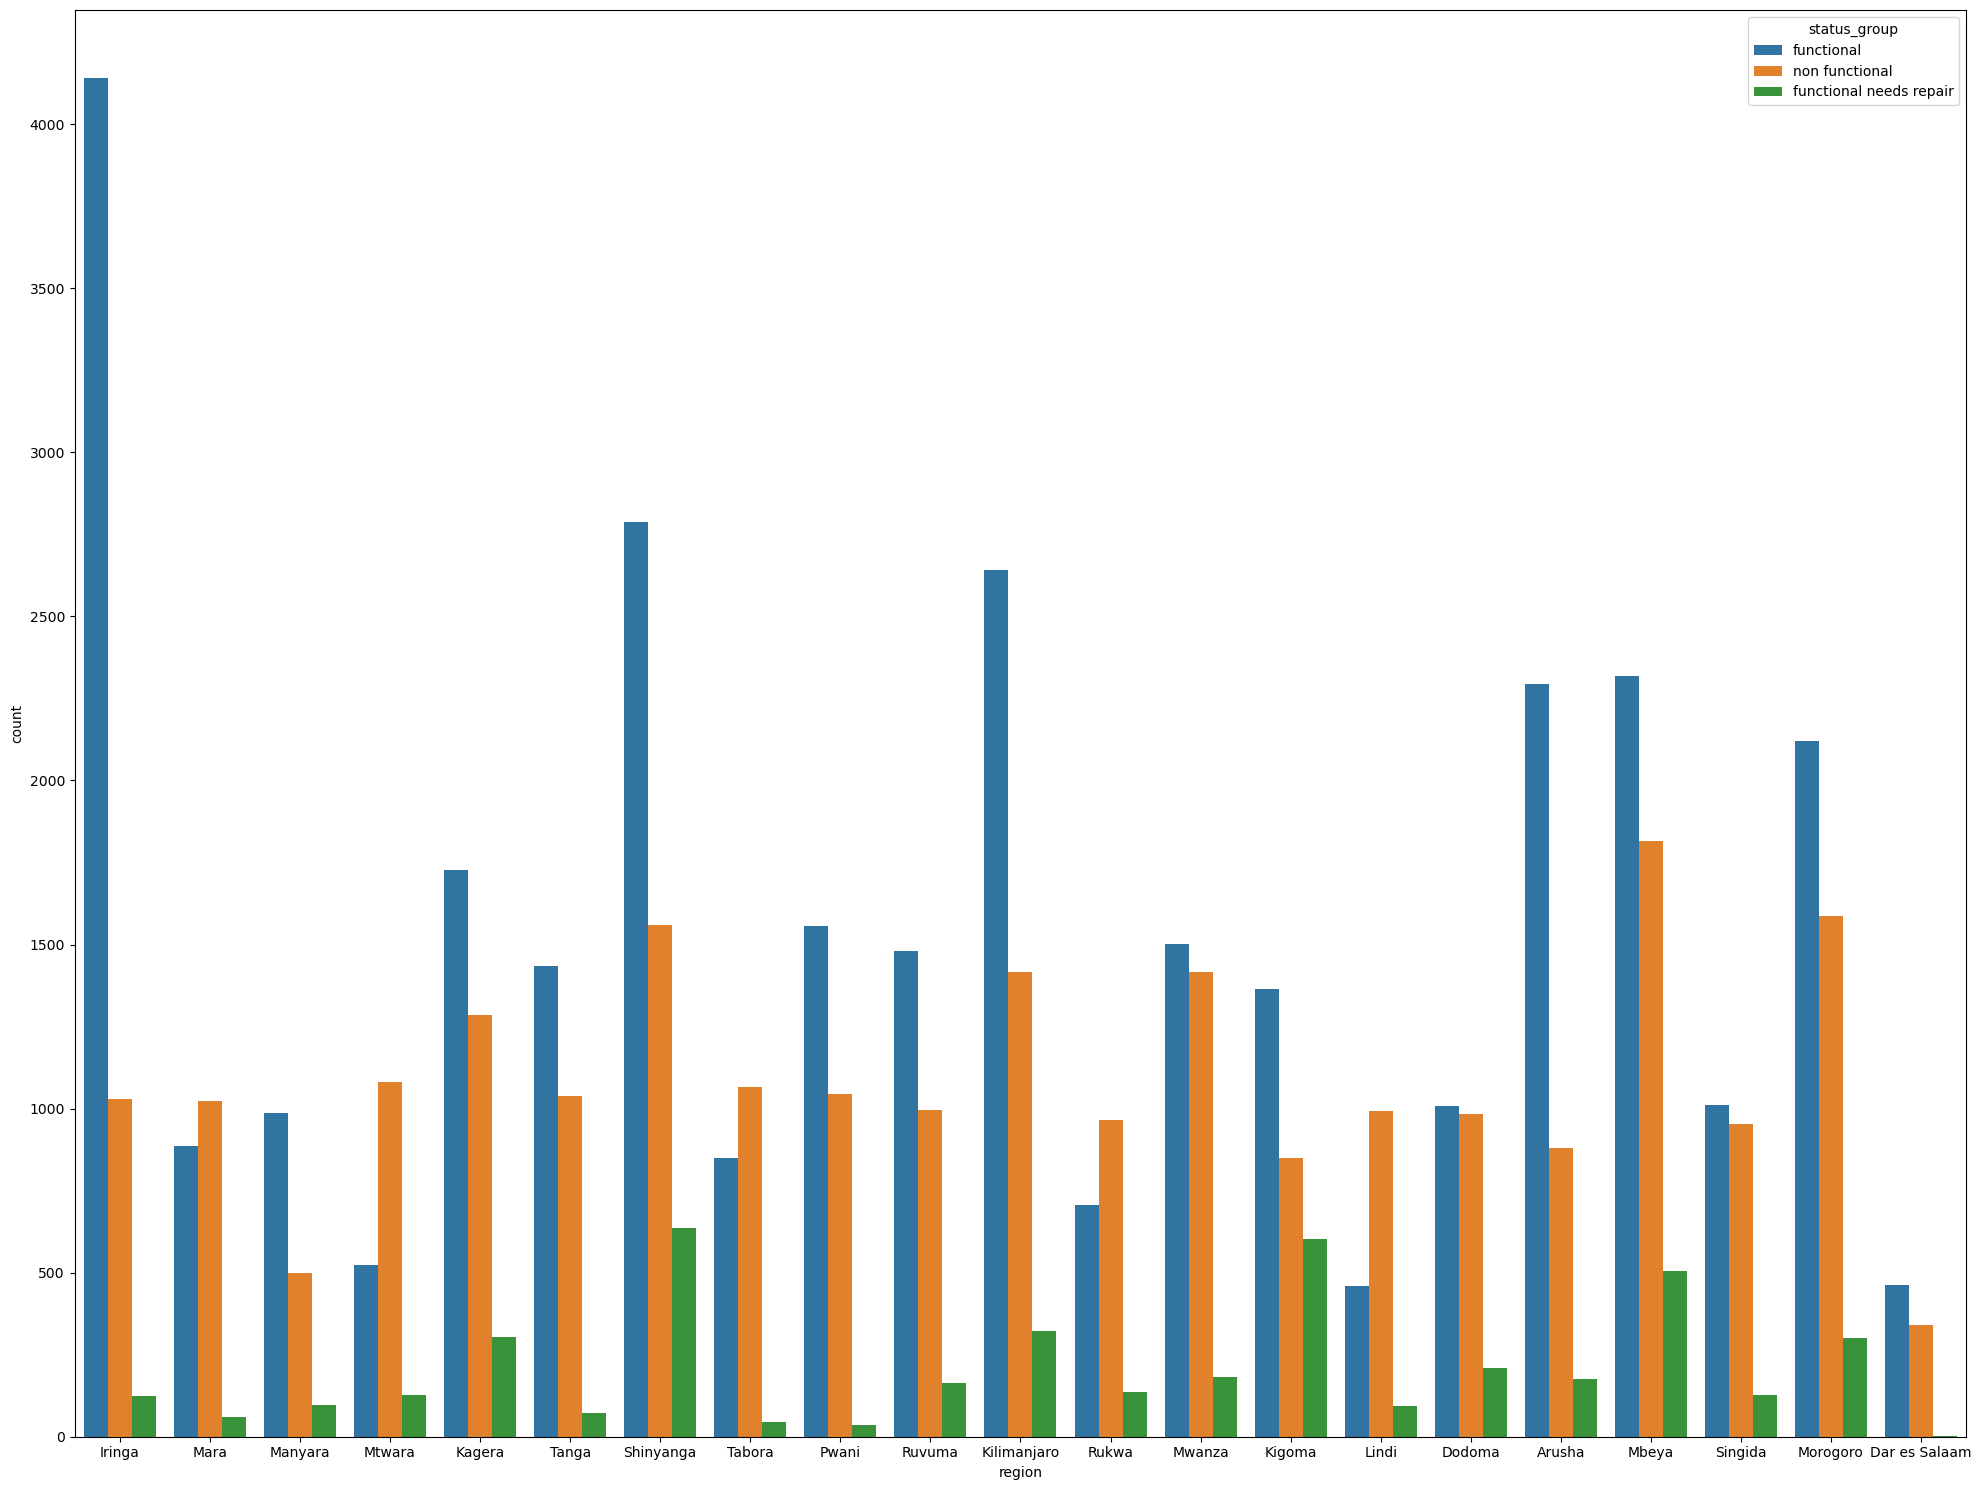

In [49]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.countplot(data=df_train_merged, x='region', hue='status_group', ax=ax)
plt.tight_layout()
plt.show()

#### Observation:
- Some region have high proportion of functional pump compare to other regions. e.g. Iringa.
- Each region may have distinct region code.

### 2.11 District_code

In [50]:
df_train_merged['district_code'].describe()

count    59400.000000
mean         5.629747
std          9.633649
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         80.000000
Name: district_code, dtype: float64

In [51]:
df_train_merged['district_code'].unique()

array([ 5,  2,  4, 63,  1,  8,  3,  6, 43,  7, 23, 33, 53, 62, 60, 30, 13,
        0, 80, 67], dtype=int64)

In [52]:
# Check if district_code == 0 is missing value
df_train_merged.loc[df_train_merged['district_code'] == 0, ['district_code', 'region', 'region_code', 'status_group']]

,district_code,region,region_code,status_group
895,0,Dodoma,1,non functional
2499,0,Dodoma,1,non functional
4706,0,Dodoma,1,non functional
5214,0,Dodoma,1,functional needs repair
16752,0,Dodoma,1,functional
16889,0,Dodoma,1,non functional
19591,0,Dodoma,1,non functional
21288,0,Dodoma,1,functional
22277,0,Dodoma,1,functional
23353,0,Dodoma,1,non functional


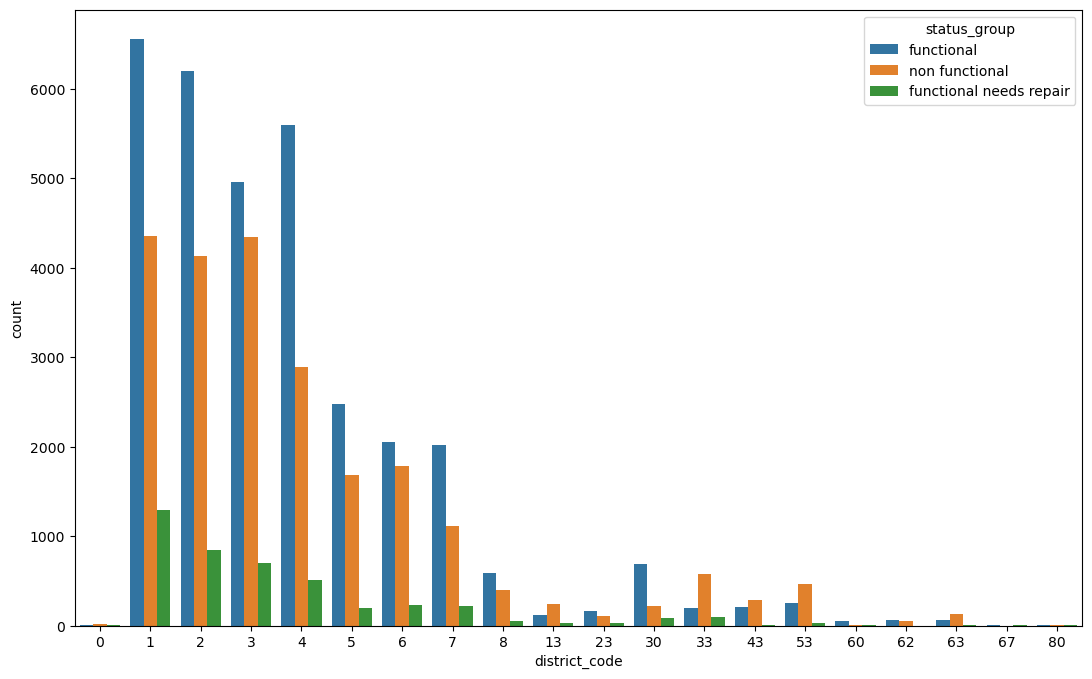

In [53]:
fig, ax = plt.subplots(figsize=(13,8))
sns.countplot(data=df_train_merged, x='district_code', hue='status_group')
plt.show()

### 2.12 Lga / ward
- A local government area (LGA) is an administrative division of a country that a local government is responsible for.
- A ward is an area within a local authority, typically used for electoral purposes.

In [54]:
df_train_merged['lga'].describe()

count      59400
unique       125
top       Njombe
freq        2503
Name: lga, dtype: object

In [55]:
df_train_merged['lga'].sort_values().unique()

array(['Arusha Rural', 'Arusha Urban', 'Babati', 'Bagamoyo', 'Bahi',
       'Bariadi', 'Biharamulo', 'Bukoba Rural', 'Bukoba Urban', 'Bukombe',
       'Bunda', 'Chamwino', 'Chato', 'Chunya', 'Dodoma Urban', 'Geita',
       'Hai', 'Hanang', 'Handeni', 'Igunga', 'Ilala', 'Ileje', 'Ilemela',
       'Iramba', 'Iringa Rural', 'Kahama', 'Karagwe', 'Karatu', 'Kasulu',
       'Kibaha', 'Kibondo', 'Kigoma Rural', 'Kigoma Urban', 'Kilindi',
       'Kilolo', 'Kilombero', 'Kilosa', 'Kilwa', 'Kinondoni', 'Kisarawe',
       'Kishapu', 'Kiteto', 'Kondoa', 'Kongwa', 'Korogwe', 'Kwimba',
       'Kyela', 'Lindi Rural', 'Lindi Urban', 'Liwale', 'Longido',
       'Ludewa', 'Lushoto', 'Mafia', 'Magu', 'Makete', 'Manyoni',
       'Masasi', 'Maswa', 'Mbarali', 'Mbeya Rural', 'Mbinga', 'Mbozi',
       'Mbulu', 'Meatu', 'Meru', 'Misenyi', 'Missungwi', 'Mkinga',
       'Mkuranga', 'Monduli', 'Morogoro Rural', 'Morogoro Urban',
       'Moshi Rural', 'Moshi Urban', 'Mpanda', 'Mpwapwa', 'Mtwara Rural',
       'Mtw

In [56]:
# Check the relation between region and lga
for region in df_train_merged['region'].unique():
    print(region)
    print(df_train_merged.loc[df_train_merged['region'] == region, 'lga'].unique())

Iringa
['Ludewa' 'Njombe' 'Kilolo' 'Makete' 'Iringa Rural' 'Mufindi']
Mara
['Serengeti' 'Musoma Rural' 'Bunda' 'Tarime' 'Rorya']
Manyara
['Simanjiro' 'Mbulu' 'Hanang' 'Kiteto' 'Babati']
Mtwara
['Nanyumbu' 'Masasi' 'Mtwara Rural' 'Newala' 'Tandahimba' 'Mtwara Urban']
Kagera
['Karagwe' 'Bukoba Rural' 'Bukoba Urban' 'Muleba' 'Misenyi' 'Chato'
 'Biharamulo' 'Ngara']
Tanga
['Mkinga' 'Muheza' 'Lushoto' 'Korogwe' 'Tanga' 'Handeni' 'Pangani'
 'Kilindi']
Shinyanga
['Shinyanga Rural' 'Kahama' 'Maswa' 'Meatu' 'Bariadi' 'Bukombe' 'Kishapu'
 'Shinyanga Urban']
Tabora
['Tabora Urban' 'Urambo' 'Sikonge' 'Igunga' 'Nzega' 'Uyui']
Pwani
['Mkuranga' 'Bagamoyo' 'Mafia' 'Kibaha' 'Kisarawe' 'Rufiji']
Ruvuma
['Namtumbo' 'Songea Rural' 'Tunduru' 'Mbinga' 'Songea Urban']
Kilimanjaro
['Siha' 'Same' 'Moshi Rural' 'Rombo' 'Moshi Urban' 'Hai' 'Mwanga']
Rukwa
['Sumbawanga Rural' 'Mpanda' 'Nkasi' 'Sumbawanga Urban']
Mwanza
['Ukerewe' 'Geita' 'Sengerema' 'Missungwi' 'Magu' 'Kwimba' 'Ilemela'
 'Nyamagana']
Kigoma
['Ki

In [57]:
df_train_merged['ward'].describe()

count     59400
unique     2092
top       Igosi
freq        307
Name: ward, dtype: object

#### Observation:
- A region have multiple region_code
- A region consist of multiple lga, a lga can be further distribute into wards, a wards consist of multiple subvillage.
- region -> lga -> wards -> subvillage (smallest)

### 2.13 Population

In [58]:
df_train_merged['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

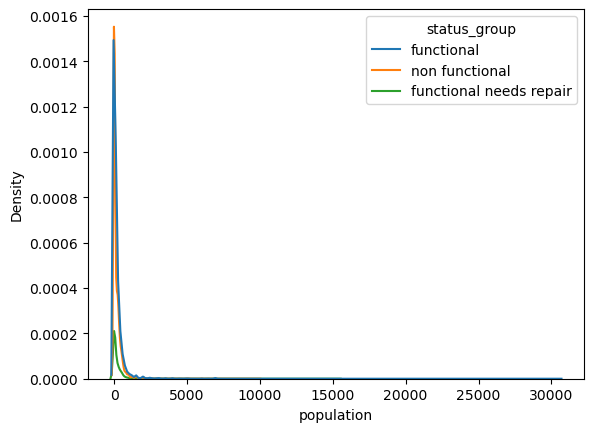

In [59]:
sns.kdeplot(data=df_train_merged, x='population', hue='status_group', fill=False)
plt.show()

#### Observation:
- Missing values encoded as 0.

#### Actions:
- Imputation

### 2.14 Public_meeting

In [60]:
df_train_merged['public_meeting'].describe()

count     56066
unique        2
top        True
freq      51011
Name: public_meeting, dtype: object

In [61]:
df_train_merged['public_meeting'].isna().sum()

3334

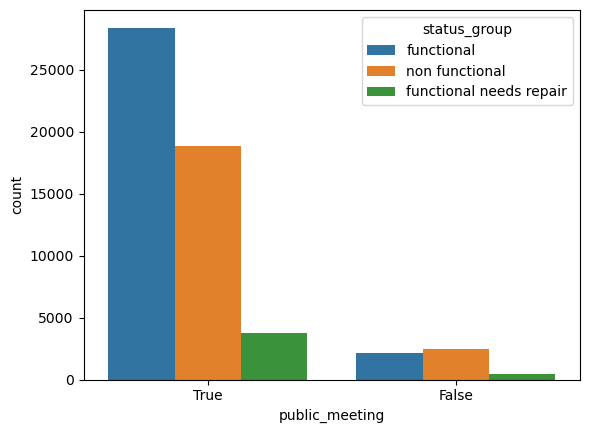

In [62]:
sns.countplot(data=df_train_merged, x='public_meeting', hue='status_group')
plt.show()

#### Observation:
- 3334 missing values.
- Waterpump that doesn't have public_meeting have higher non-functional waterpipe as compared to functional.

#### Actions:
- Imputation

### 2.15 Recorded_by

In [63]:
df_train_merged['recorded_by'].describe()

count                       59400
unique                          1
top       GeoData Consultants Ltd
freq                        59400
Name: recorded_by, dtype: object

#### Actions:
- recorded_by features can be dropped as there is only 1 value.

### 2.16 Scheme_management / management_group

In [64]:
df_train_merged['scheme_management'].describe()

count     55523
unique       12
top         VWC
freq      36793
Name: scheme_management, dtype: object

In [65]:
print(df_train_merged['scheme_management'].unique())

['VWC' 'Other' nan 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None']


In [66]:
print('Number of NaN value:', df_train_merged['scheme_management'].isna().sum())
print('Number of None value:', df_train_merged.loc[df_train_merged['scheme_management'] == 'None', 'scheme_management'].count())

Number of NaN value: 3877
Number of None value: 1


In [67]:
print('Scheme management:')
print(df_train_merged['scheme_management'].value_counts(normalize=True), '\n')

print('Management group:')
df_train_merged['management_group'].value_counts(normalize=True)

Scheme management:
VWC                 0.662662
WUG                 0.093763
Water authority     0.056787
WUA                 0.051924
Water Board         0.049493
Parastatal          0.030258
Private operator    0.019145
Company             0.019109
Other               0.013796
SWC                 0.001747
Trust               0.001297
None                0.000018
Name: scheme_management, dtype: float64 

Management group:


user-group    0.883670
commercial    0.061246
parastatal    0.029764
other         0.015875
unknown       0.009444
Name: management_group, dtype: float64

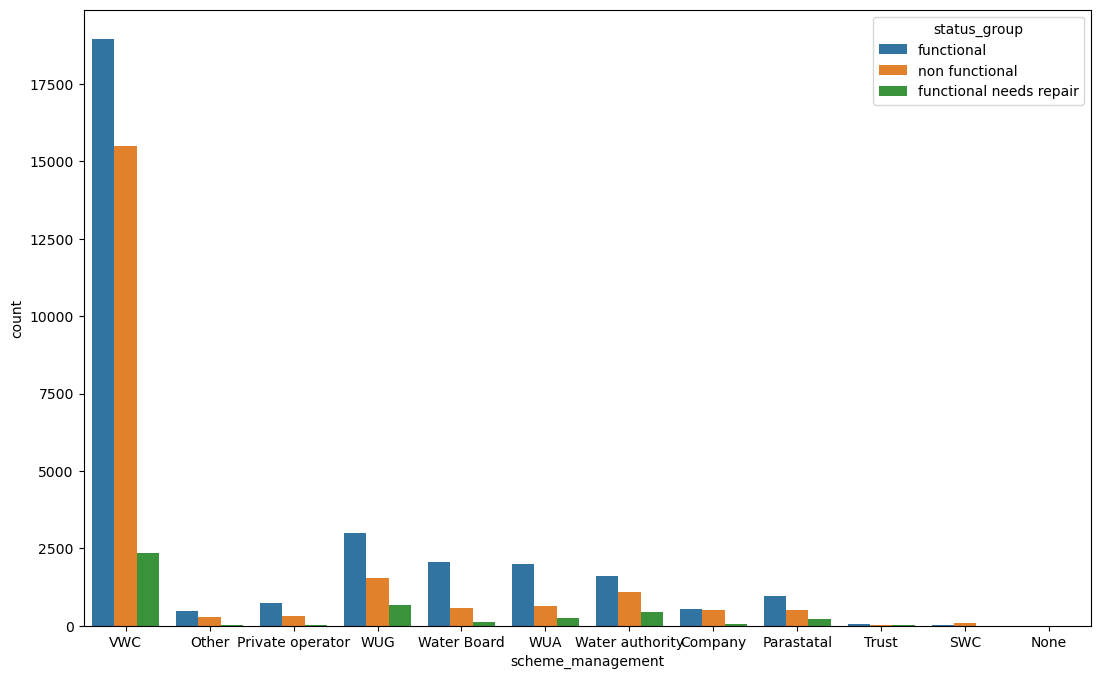

In [68]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.countplot(data=df_train_merged, x='scheme_management', hue='status_group', ax=ax)
plt.show()

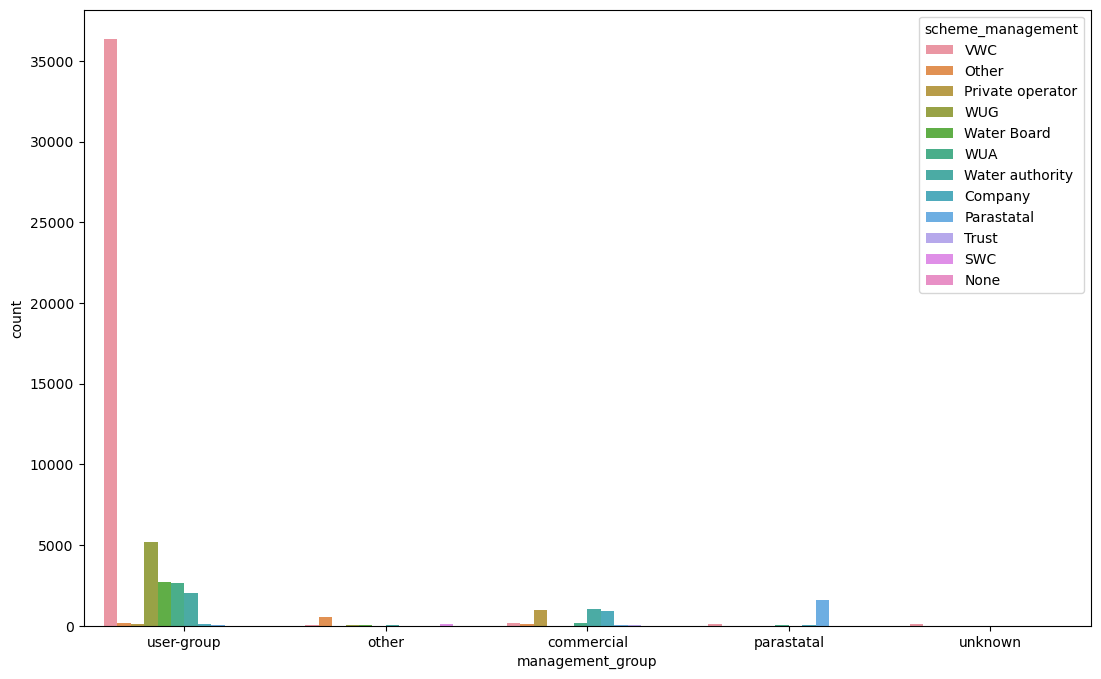

In [69]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.countplot(data=df_train_merged, x='management_group', hue='scheme_management')
plt.show()

#### Observation:
- 3877 missing values & 1 None value.
- Most pumps are managed by VWC.

#### Actions:
- Imputation

### 2.17 Management

In [70]:
df_train_merged['management'].describe()

count     59400
unique       12
top         vwc
freq      40507
Name: management, dtype: object

In [71]:
print("Management's unique value: ")
print(df_train_merged['management'].sort_values().unique(), '\n')
print("Scheme_management's unique value: ")
print(df_train_merged['scheme_management'].sort_values().unique())

Management's unique value: 
['company' 'other' 'other - school' 'parastatal' 'private operator'
 'trust' 'unknown' 'vwc' 'water authority' 'water board' 'wua' 'wug'] 

Scheme_management's unique value: 
['Company' 'None' 'Other' 'Parastatal' 'Private operator' 'SWC' 'Trust'
 'VWC' 'WUA' 'WUG' 'Water Board' 'Water authority' nan]


In [72]:
print('Number of NaN value:', df_train_merged['management'].isna().sum())
print('Number of Unknown value:', df_train_merged.loc[df_train_merged['management'] == 'unknown', 'management'].count())
df_train_merged['management'].value_counts(normalize=True)

Number of NaN value: 0
Number of Unknown value: 561


vwc                 0.681936
wug                 0.109680
water board         0.049377
wua                 0.042677
private operator    0.033182
parastatal          0.029764
water authority     0.015219
other               0.014209
company             0.011532
unknown             0.009444
other - school      0.001667
trust               0.001313
Name: management, dtype: float64

In [73]:
# Display management & scheme management
df_train_merged.groupby(['scheme_management' , 'management'])['id'].count().reset_index()

,scheme_management,management,id
0,Company,company,674
1,Company,other,2
2,Company,parastatal,25
3,Company,private operator,224
4,Company,vwc,135
...,...,...,...
80,Water authority,vwc,1297
81,Water authority,water authority,867
82,Water authority,water board,730
83,Water authority,wua,12


#### Observation:
- management has the same cardinality as scheme_management and contain very similar values.
- The relationship between management and scheme_mangement are not clear.

### 2.18 Scheme_name

In [74]:
df_train_merged['scheme_name'].describe()

count     31234
unique     2696
top           K
freq        682
Name: scheme_name, dtype: object

In [75]:
print('Number of NaN value:', df_train_merged['scheme_name'].isna().sum())

Number of NaN value: 28166


#### Observation:
- scheme_name has high cardinality.
- Nearly half of the values are missing.

#### Actions: 
- Drop the column.

### 2.19 Construction_year

In [76]:
df_train_merged['construction_year'].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [77]:
df_train_merged['construction_year'].value_counts(normalize=True)

0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64

In [78]:
for year in df_train_merged['construction_year'].sort_values().unique():
    print('Year:', year)
    for status in df_train_merged['status_group'].unique():
        value = round(df_train_merged.loc[(df_train_merged['construction_year'] == year) & (df_train_merged['status_group'] == status), 'status_group'].count().sum() / df_train_merged.loc[(df_train_merged['construction_year'] == year), 'status_group'].count().sum() * 100)
        print(status, ':', value, '%')
    print('\n')

Year: 0
functional : 51 %
non functional : 40 %
functional needs repair : 9 %


Year: 1960
functional : 24 %
non functional : 71 %
functional needs repair : 6 %


Year: 1961
functional : 10 %
non functional : 76 %
functional needs repair : 14 %


Year: 1962
functional : 23 %
non functional : 73 %
functional needs repair : 3 %


Year: 1963
functional : 36 %
non functional : 56 %
functional needs repair : 7 %


Year: 1964
functional : 18 %
non functional : 80 %
functional needs repair : 2 %


Year: 1965
functional : 58 %
non functional : 37 %
functional needs repair : 5 %


Year: 1966
functional : 35 %
non functional : 65 %
functional needs repair : 0 %


Year: 1967
functional : 35 %
non functional : 45 %
functional needs repair : 19 %


Year: 1968
functional : 29 %
non functional : 66 %
functional needs repair : 5 %


Year: 1969
functional : 25 %
non functional : 69 %
functional needs repair : 5 %


Year: 1970
functional : 24 %
non functional : 72 %
functional needs repair : 4 %


Year:

#### Observation:
- 34% missing values.
- Pumps constructed in recent years are more likely to be functional.

#### Actions:
- Imputation

### 2.20 Extraction_type / extraction_type_group / extraction_type_class

In [79]:
print(df_train_merged['extraction_type'].describe())
print(df_train_merged['extraction_type_group'].describe())
print(df_train_merged['extraction_type_class'].describe())

count       59400
unique         18
top       gravity
freq        26780
Name: extraction_type, dtype: object
count       59400
unique         13
top       gravity
freq        26780
Name: extraction_type_group, dtype: object
count       59400
unique          7
top       gravity
freq        26780
Name: extraction_type_class, dtype: object


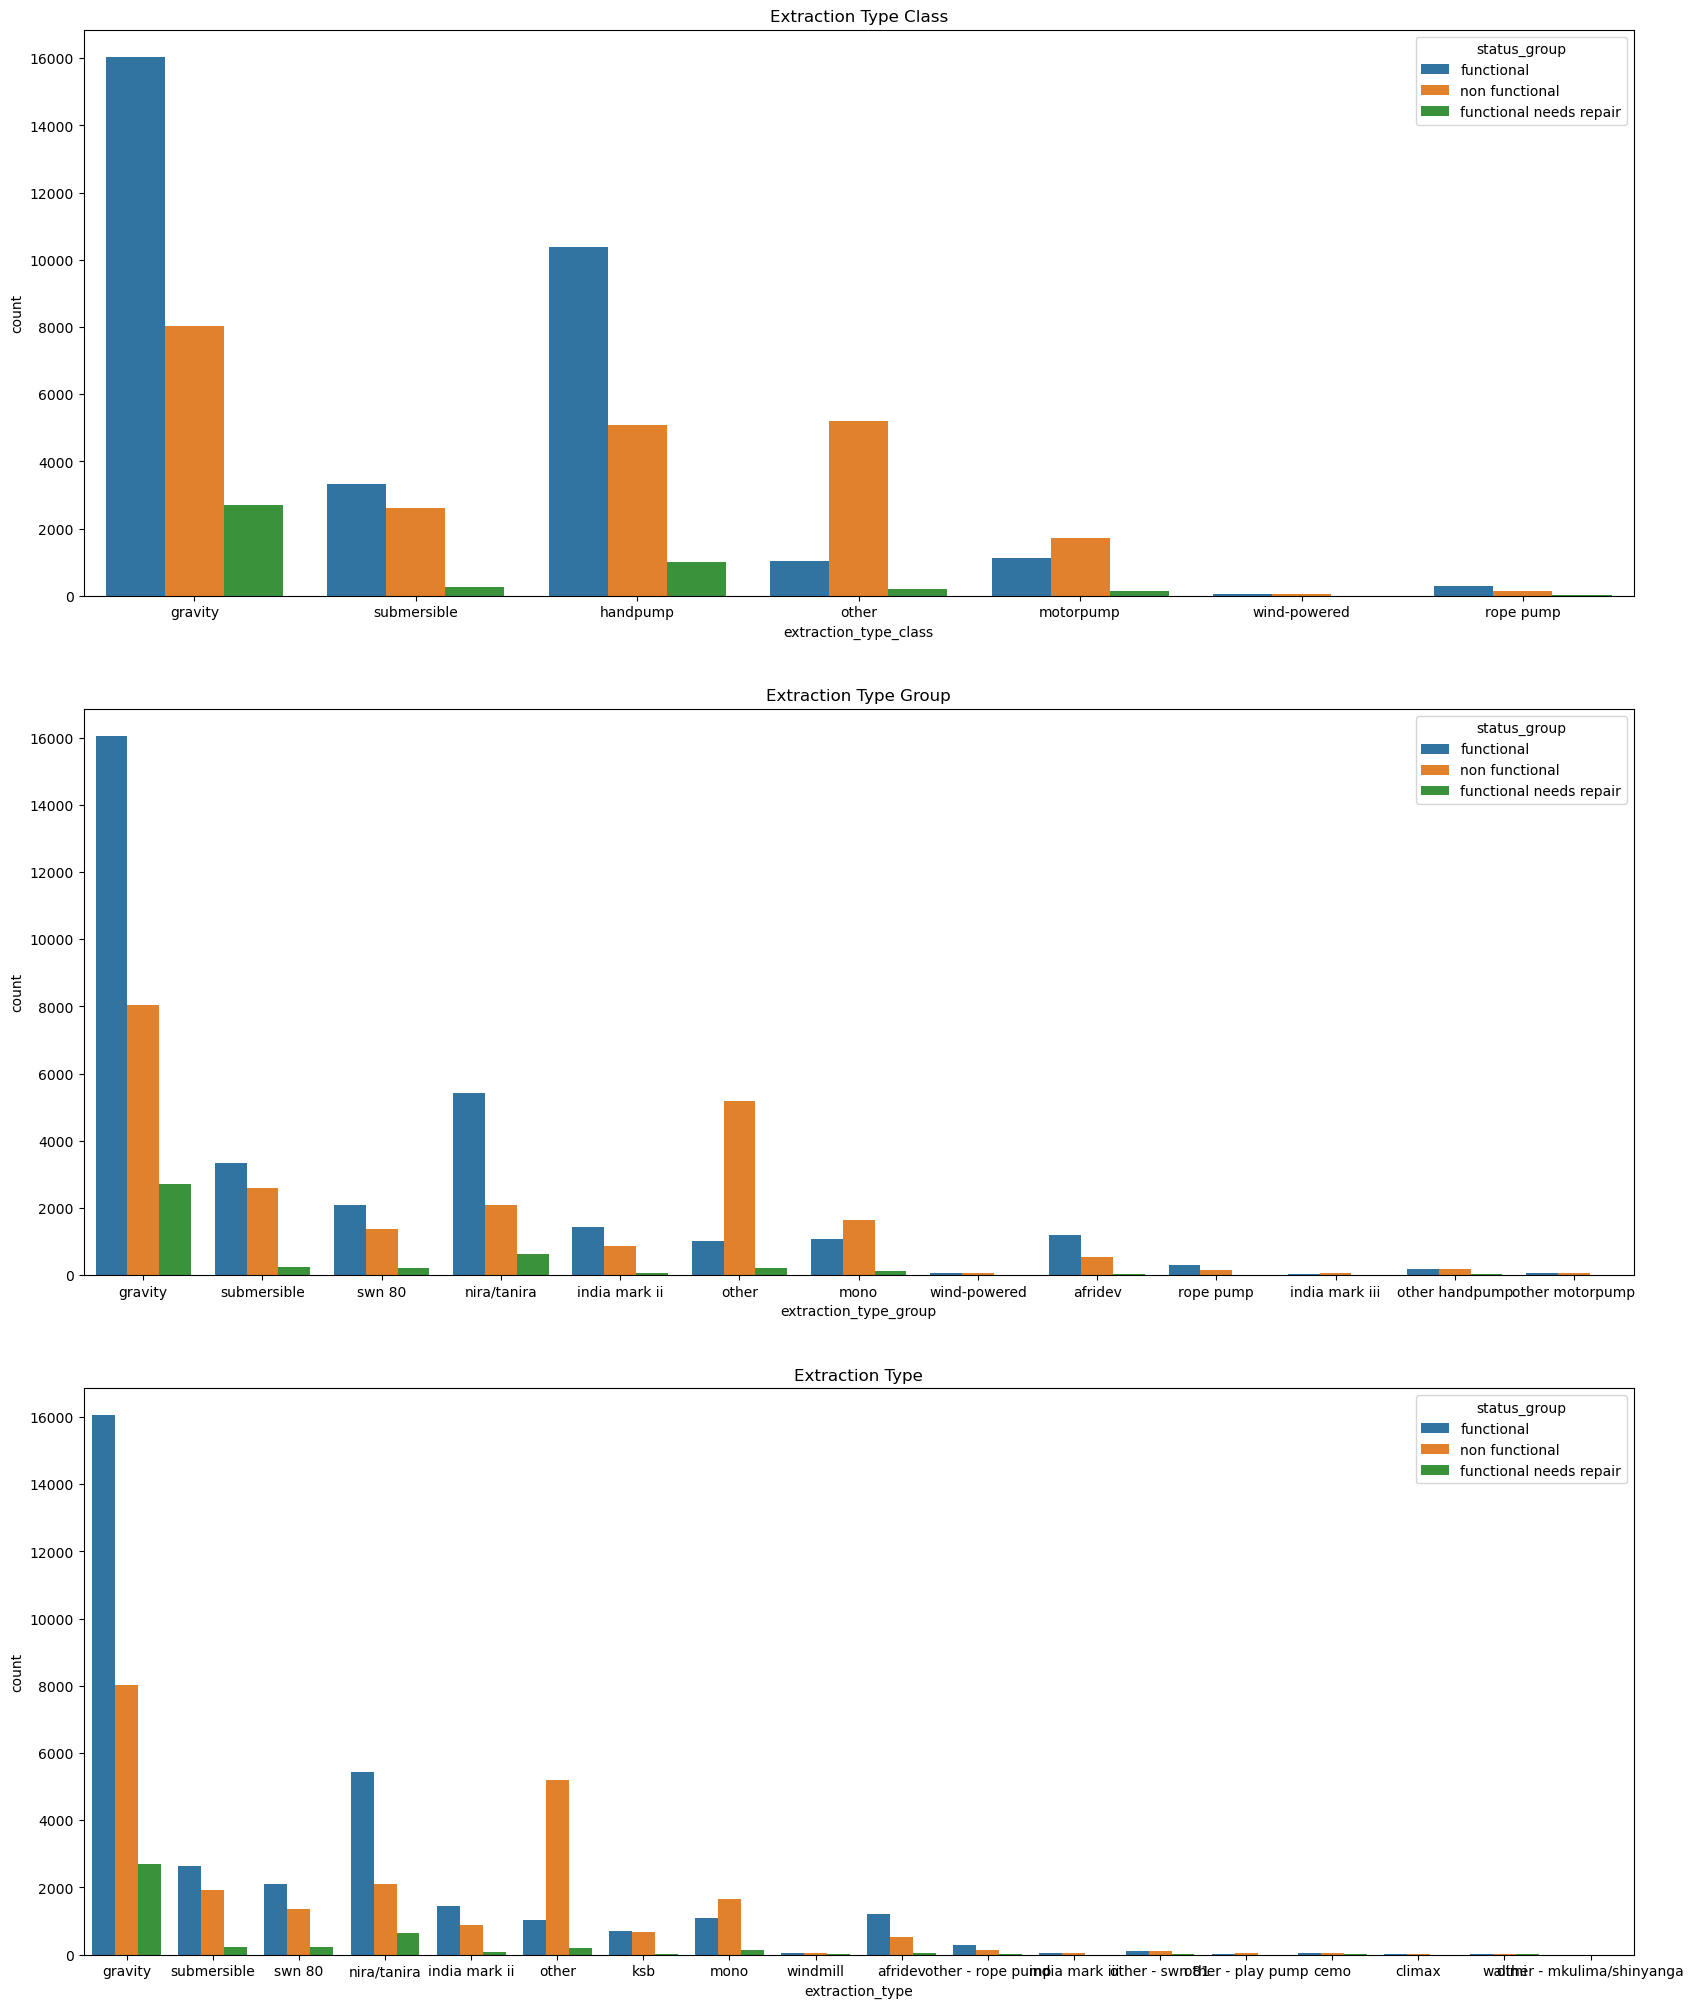

In [80]:
fig, ax = plt.subplots(3, 1, figsize=(20, 25))
sns.countplot(data=df_train_merged, x='extraction_type_class', hue='status_group', ax=ax[0])
ax[0].set_title('Extraction Type Class')
sns.countplot(data=df_train_merged, x='extraction_type_group', hue='status_group', ax=ax[1])
ax[1].set_title('Extraction Type Group')
sns.countplot(data=df_train_merged, x='extraction_type', hue='status_group', ax=ax[2])
ax[2].set_title('Extraction Type')
plt.show()

In [81]:
# Display the combination of extraction_type_class, extraction_type_group & extraction_type with respect to its count in the 'id' column
df_train_merged.groupby(['extraction_type_class', 'extraction_type_group', 'extraction_type'])['id'].count().reset_index()

,extraction_type_class,extraction_type_group,extraction_type,id
0,gravity,gravity,gravity,26780
1,handpump,afridev,afridev,1770
2,handpump,india mark ii,india mark ii,2400
3,handpump,india mark iii,india mark iii,98
4,handpump,nira/tanira,nira/tanira,8154
5,handpump,other handpump,other - mkulima/shinyanga,2
6,handpump,other handpump,other - play pump,85
7,handpump,other handpump,other - swn 81,229
8,handpump,other handpump,walimi,48
9,handpump,swn 80,swn 80,3670


#### Observation:
- Each of extraction_type_class is divided into multiple extraction_type_group and each source type is further divided into extraction_type.
- extraction_type_class -> extraction_type_group -> extraction_type

### 2.21 Payment / payment_type

In [82]:
print(df_train_merged['payment'].describe())
print(df_train_merged['payment_type'].describe())

count         59400
unique            7
top       never pay
freq          25348
Name: payment, dtype: object
count         59400
unique            7
top       never pay
freq          25348
Name: payment_type, dtype: object


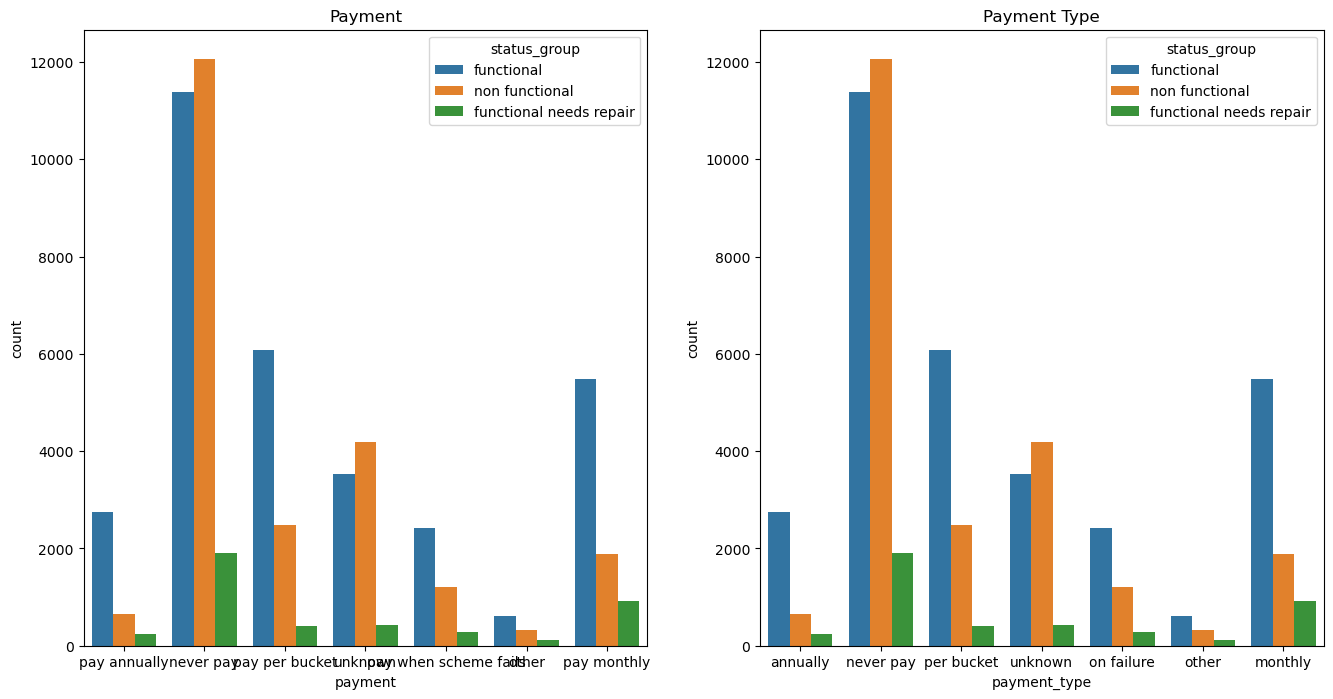

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.countplot(data=df_train_merged, x='payment', hue='status_group', ax=ax[0])
ax[0].set_title('Payment')
sns.countplot(data=df_train_merged, x='payment_type', hue='status_group', ax=ax[1])
ax[1].set_title('Payment Type')
plt.show()

In [84]:
# Display the combination of payment and payment_type with respect to its count in the 'id' column
df_train_merged.groupby(['payment', 'payment_type'])['id'].count().reset_index()

,payment,payment_type,id
0,never pay,never pay,25348
1,other,other,1054
2,pay annually,annually,3642
3,pay monthly,monthly,8300
4,pay per bucket,per bucket,8985
5,pay when scheme fails,on failure,3914
6,unknown,unknown,8157


#### Observation:
- Pump involves payment are likely to be functional.

#### Actions:
- payment & payment_type contain the exact values, therefore either 1 can be drop.

### 2.22 Water_quality / quality_group

In [85]:
print(df_train_merged['water_quality'].describe())
print(df_train_merged['quality_group'].describe())

count     59400
unique        8
top        soft
freq      50818
Name: water_quality, dtype: object
count     59400
unique        6
top        good
freq      50818
Name: quality_group, dtype: object


In [86]:
print('Unique value for water quality:', df_train_merged['water_quality'].sort_values().unique())
print('Unique value for quality group:', df_train_merged['quality_group'].sort_values().unique())

Unique value for water quality: ['coloured' 'fluoride' 'fluoride abandoned' 'milky' 'salty'
 'salty abandoned' 'soft' 'unknown']
Unique value for quality group: ['colored' 'fluoride' 'good' 'milky' 'salty' 'unknown']


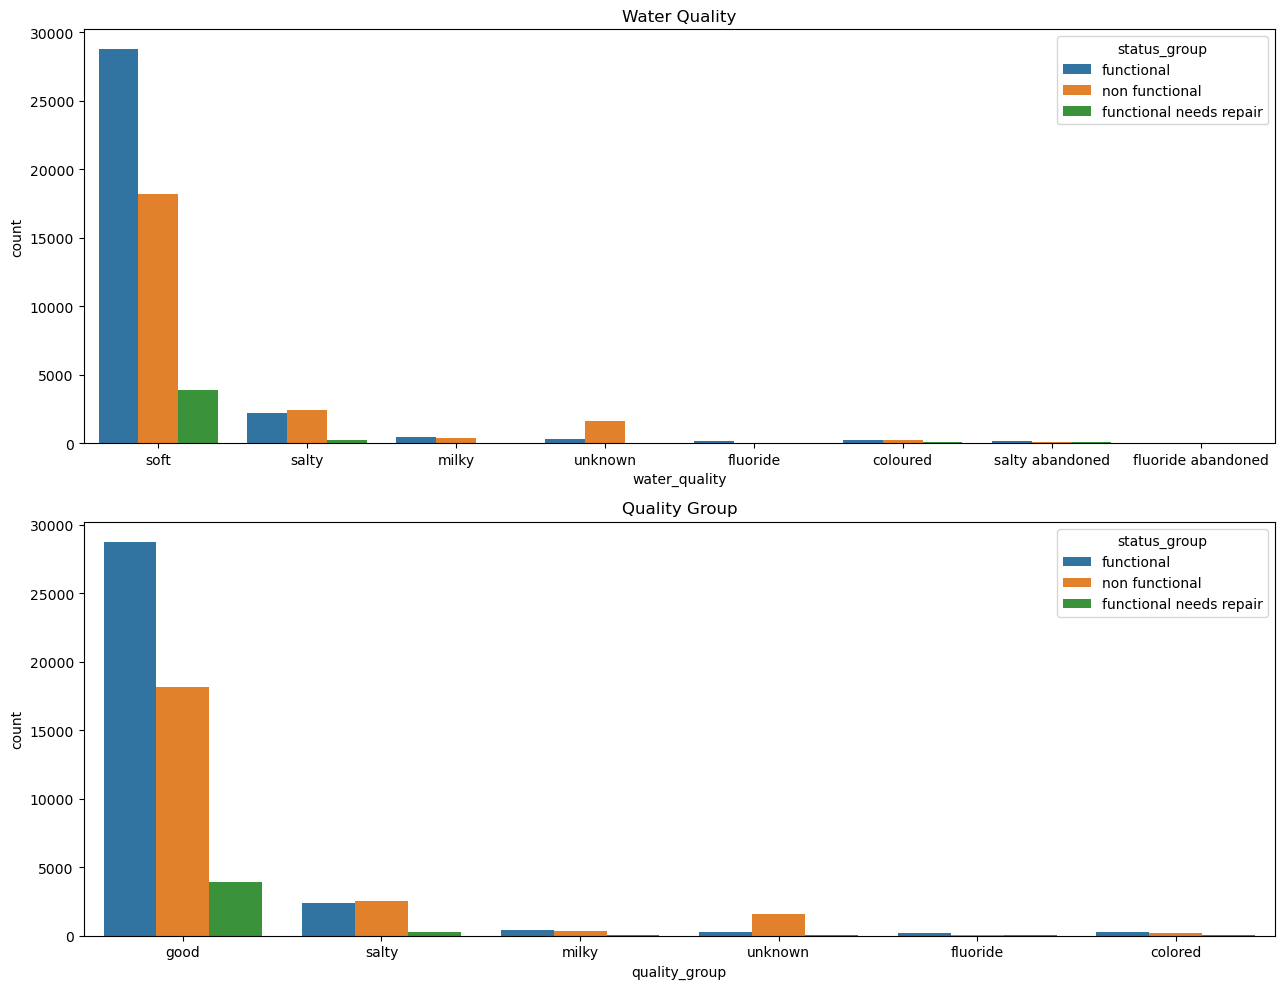

In [87]:
fig, ax = plt.subplots(2, 1, figsize=(13, 10))
sns.countplot(data=df_train_merged, x='water_quality', hue='status_group', ax=ax[0])
ax[0].set_title('Water Quality')
sns.countplot(data=df_train_merged, x='quality_group', hue='status_group', ax=ax[1])
ax[1].set_title('Quality Group')
plt.tight_layout()
plt.show()

In [88]:
# Display the combination quality_group & water_quality with respect to its count in the 'id' column
df_train_merged.groupby(['quality_group', 'water_quality'])['id'].count().reset_index()

,quality_group,water_quality,id
0,colored,coloured,490
1,fluoride,fluoride,200
2,fluoride,fluoride abandoned,17
3,good,soft,50818
4,milky,milky,804
5,salty,salty,4856
6,salty,salty abandoned,339
7,unknown,unknown,1876


#### Observation:
- water_quality contains 8 unique value while quality group contains 6.
- Hierachical Relationship: The only difference is fluoride & salty in quality_group contain subgroup fluoride, fluoride abandoned & salty, salty abandoned.

#### Actions:
- Select only 1 feature that is relevant to reduce redundant information.
- Use dimensionality reduction such as PCA.

### 2.23 Quantity / quantity_group

In [89]:
print(df_train_merged['quantity'].describe())
print(df_train_merged['quantity_group'].describe())

count      59400
unique         5
top       enough
freq       33186
Name: quantity, dtype: object
count      59400
unique         5
top       enough
freq       33186
Name: quantity_group, dtype: object


In [90]:
print('Unique value for water quantity:', df_train_merged['quantity'].sort_values().unique())
print('Unique value for quantity group:', df_train_merged['quantity_group'].sort_values().unique())

Unique value for water quantity: ['dry' 'enough' 'insufficient' 'seasonal' 'unknown']
Unique value for quantity group: ['dry' 'enough' 'insufficient' 'seasonal' 'unknown']


In [91]:
# Display the combination of quantity & quantity_group with respect to its count in the 'id' column
df_train_merged.groupby(['quantity', 'quantity_group'])['id'].count().reset_index()

,quantity,quantity_group,id
0,dry,dry,6246
1,enough,enough,33186
2,insufficient,insufficient,15129
3,seasonal,seasonal,4050
4,unknown,unknown,789


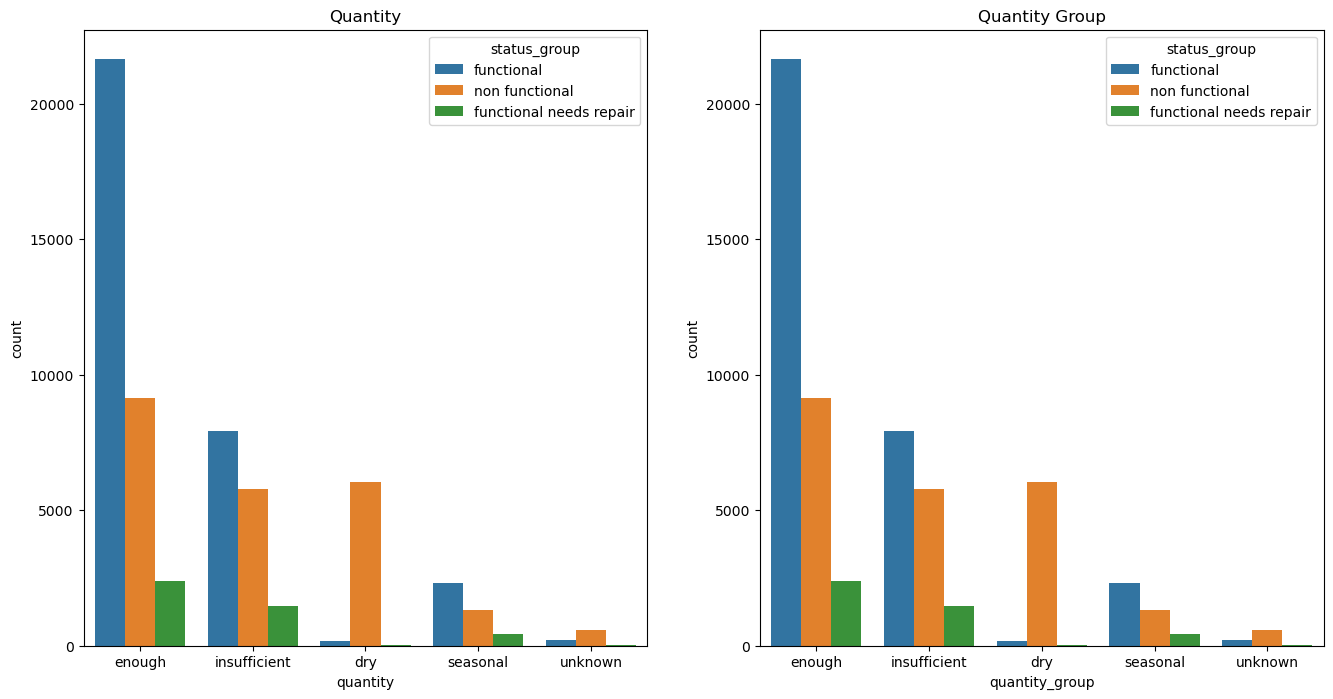

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.countplot(data=df_train_merged, x='quantity', hue='status_group', ax=ax[0])
ax[0].set_title('Quantity')
sns.countplot(data=df_train_merged, x='quantity_group', hue='status_group', ax=ax[1])
ax[1].set_title('Quantity Group')
plt.show()

#### Observation:
- Most dry pump are non functional.

#### Actions:
- quantity & quantity_group contain the exact values, therefore either 1 can be drop.

### 2.24 Source / source_type / source_class

In [93]:
print(df_train_merged['source'].describe())
print(df_train_merged['source_type'].describe())
print(df_train_merged['source_class'].describe())

count      59400
unique        10
top       spring
freq       17021
Name: source, dtype: object
count      59400
unique         7
top       spring
freq       17021
Name: source_type, dtype: object
count           59400
unique              3
top       groundwater
freq            45794
Name: source_class, dtype: object


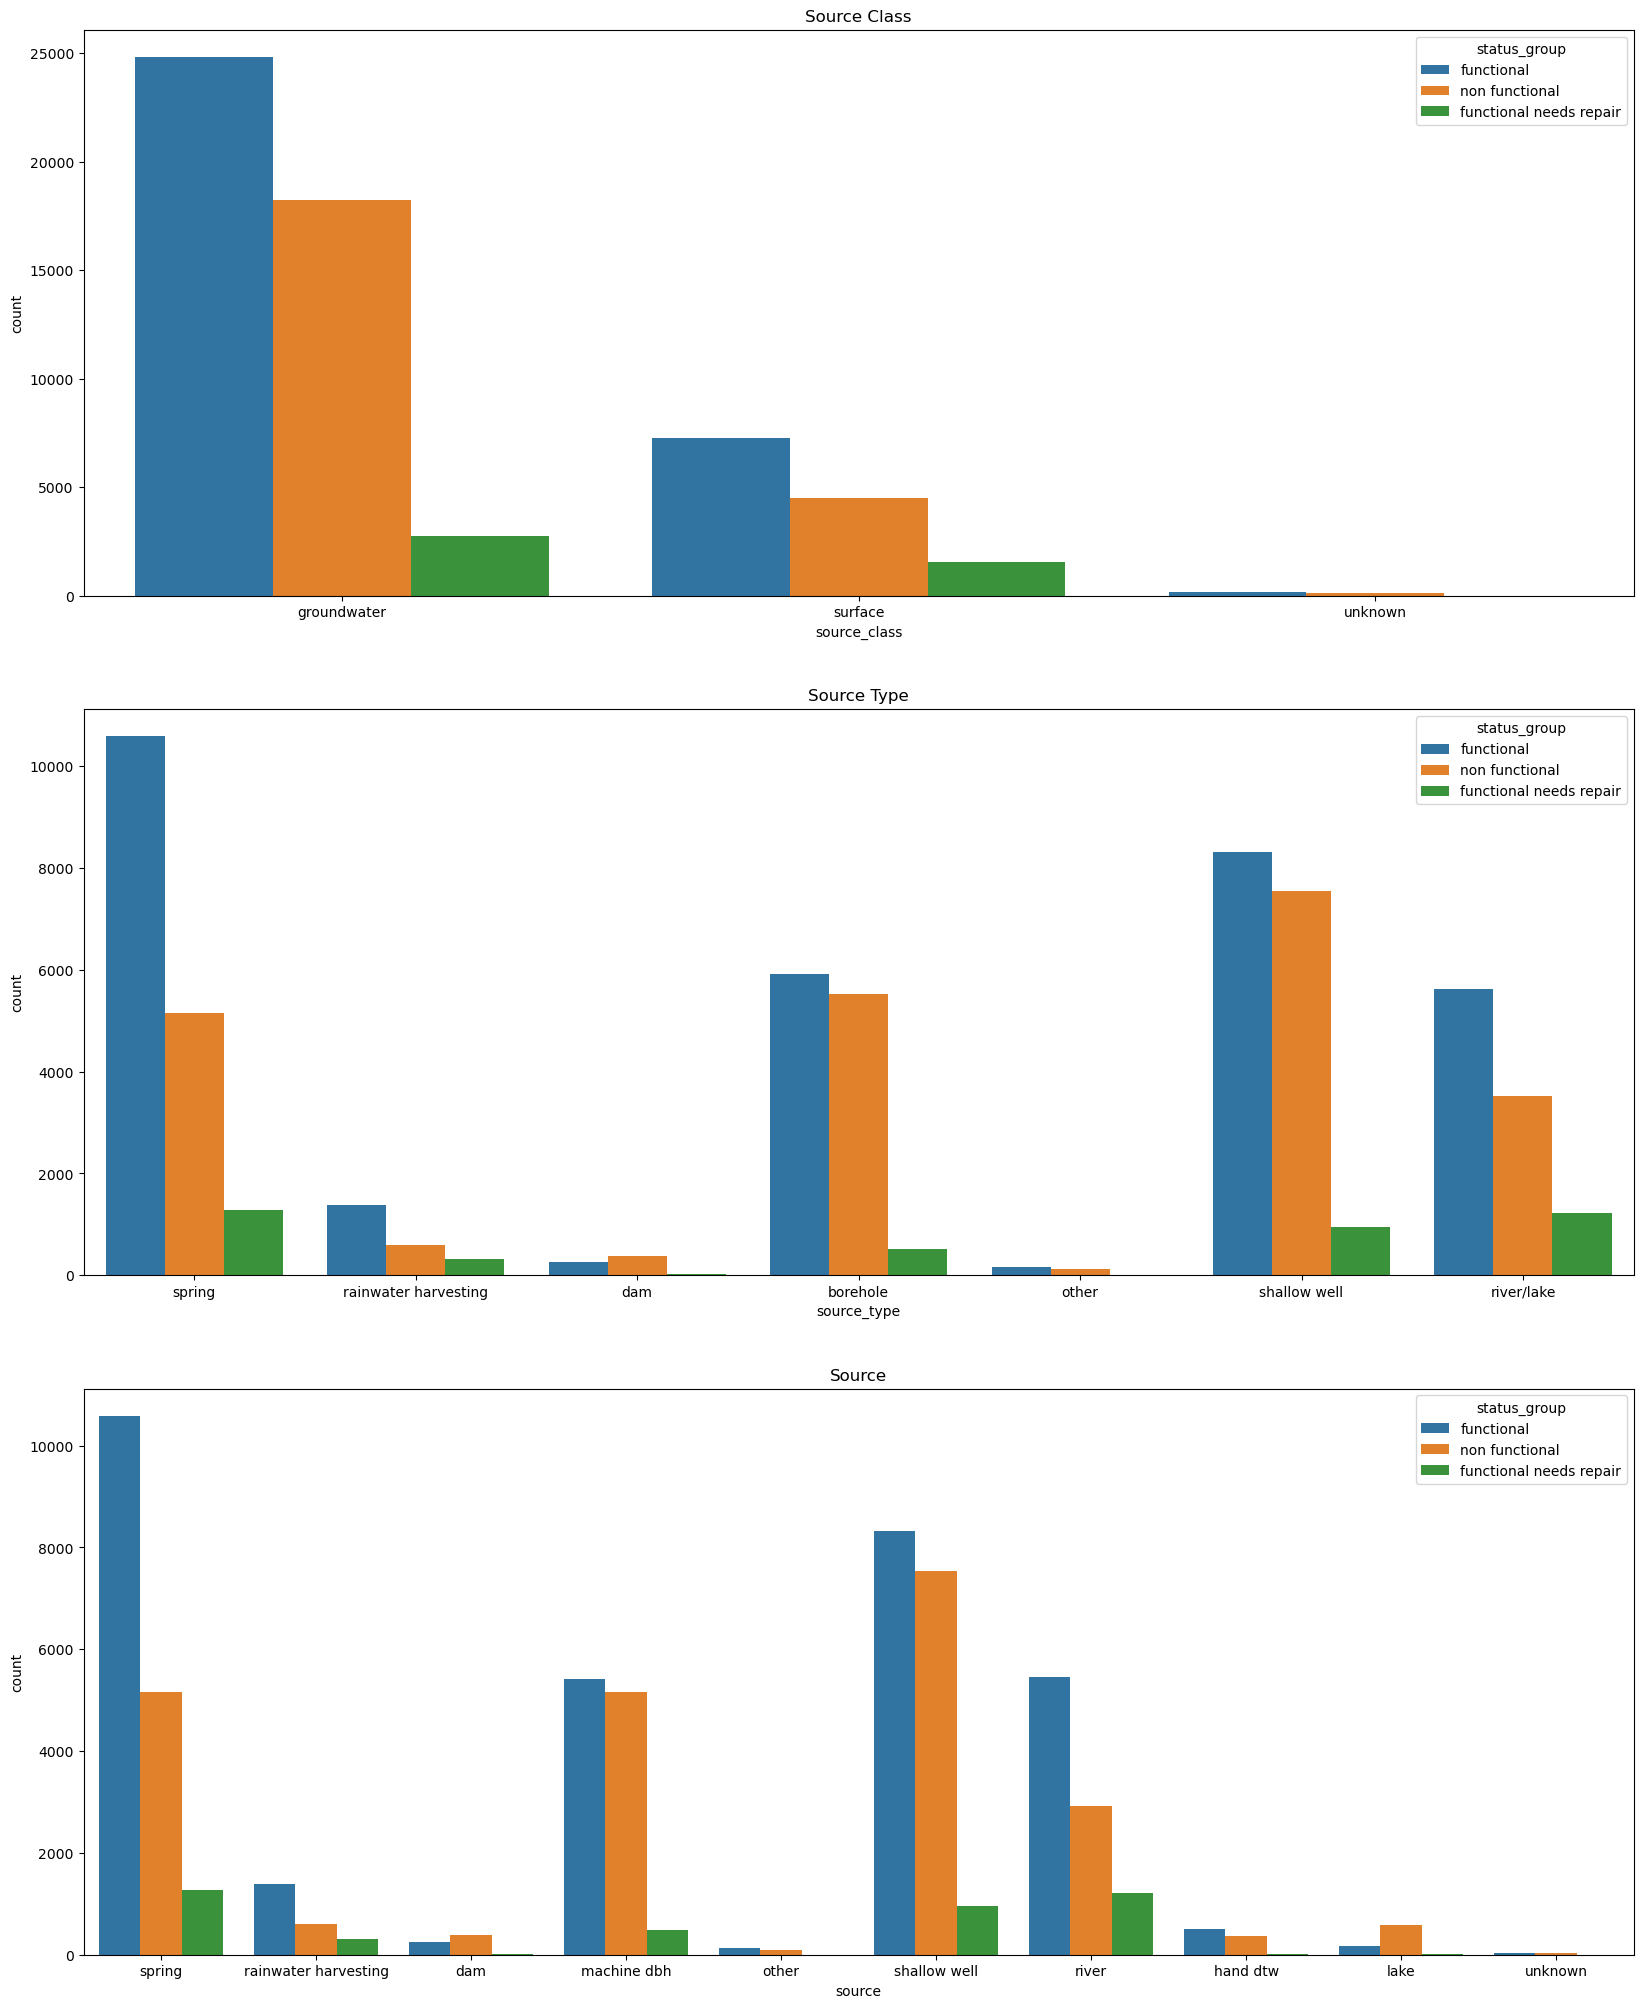

In [94]:
fig, ax = plt.subplots(3, 1, figsize=(20, 25))
sns.countplot(data=df_train_merged, x='source_class', hue='status_group', ax=ax[0])
ax[0].set_title('Source Class')
sns.countplot(data=df_train_merged, x='source_type', hue='status_group', ax=ax[1])
ax[1].set_title('Source Type')
sns.countplot(data=df_train_merged, x='source', hue='status_group', ax=ax[2])
ax[2].set_title('Source')
plt.show()

In [95]:
# Display the combination of source, source_type & source_class with respect to its count in the 'id' column
df_train_merged.groupby(['source_class', 'source_type', 'source'])['id'].count().reset_index()

,source_class,source_type,source,id
0,groundwater,borehole,hand dtw,874
1,groundwater,borehole,machine dbh,11075
2,groundwater,shallow well,shallow well,16824
3,groundwater,spring,spring,17021
4,surface,dam,dam,656
5,surface,rainwater harvesting,rainwater harvesting,2295
6,surface,river/lake,lake,765
7,surface,river/lake,river,9612
8,unknown,other,other,212
9,unknown,other,unknown,66


#### Observation:
- Each of source_class is divided into multiple source_type and each source type is further divided into multiple source.
- source_class -> source_type -> source

#### Actions:
- Keep source_type and source.

### 2.25 Waterpoint_type / waterpoint_type_group

In [96]:
print(df_train_merged['waterpoint_type'].describe())
print(df_train_merged['waterpoint_type_group'].describe())

count                  59400
unique                     7
top       communal standpipe
freq                   28522
Name: waterpoint_type, dtype: object
count                  59400
unique                     6
top       communal standpipe
freq                   34625
Name: waterpoint_type_group, dtype: object


In [97]:
print('Unique value for waterpoint type:', df_train_merged['waterpoint_type'].sort_values().unique())
print('Unique value for waterpoint type group:', df_train_merged['waterpoint_type_group'].sort_values().unique())

Unique value for waterpoint type: ['cattle trough' 'communal standpipe' 'communal standpipe multiple' 'dam'
 'hand pump' 'improved spring' 'other']
Unique value for waterpoint type group: ['cattle trough' 'communal standpipe' 'dam' 'hand pump' 'improved spring'
 'other']


In [98]:
# Display the combination waterpoint_type & waterpoint_type_group with respect to its count in the 'id' column
df_train_merged.groupby(['waterpoint_type_group', 'waterpoint_type'])['id'].count().reset_index()

,waterpoint_type_group,waterpoint_type,id
0,cattle trough,cattle trough,116
1,communal standpipe,communal standpipe,28522
2,communal standpipe,communal standpipe multiple,6103
3,dam,dam,7
4,hand pump,hand pump,17488
5,improved spring,improved spring,784
6,other,other,6380


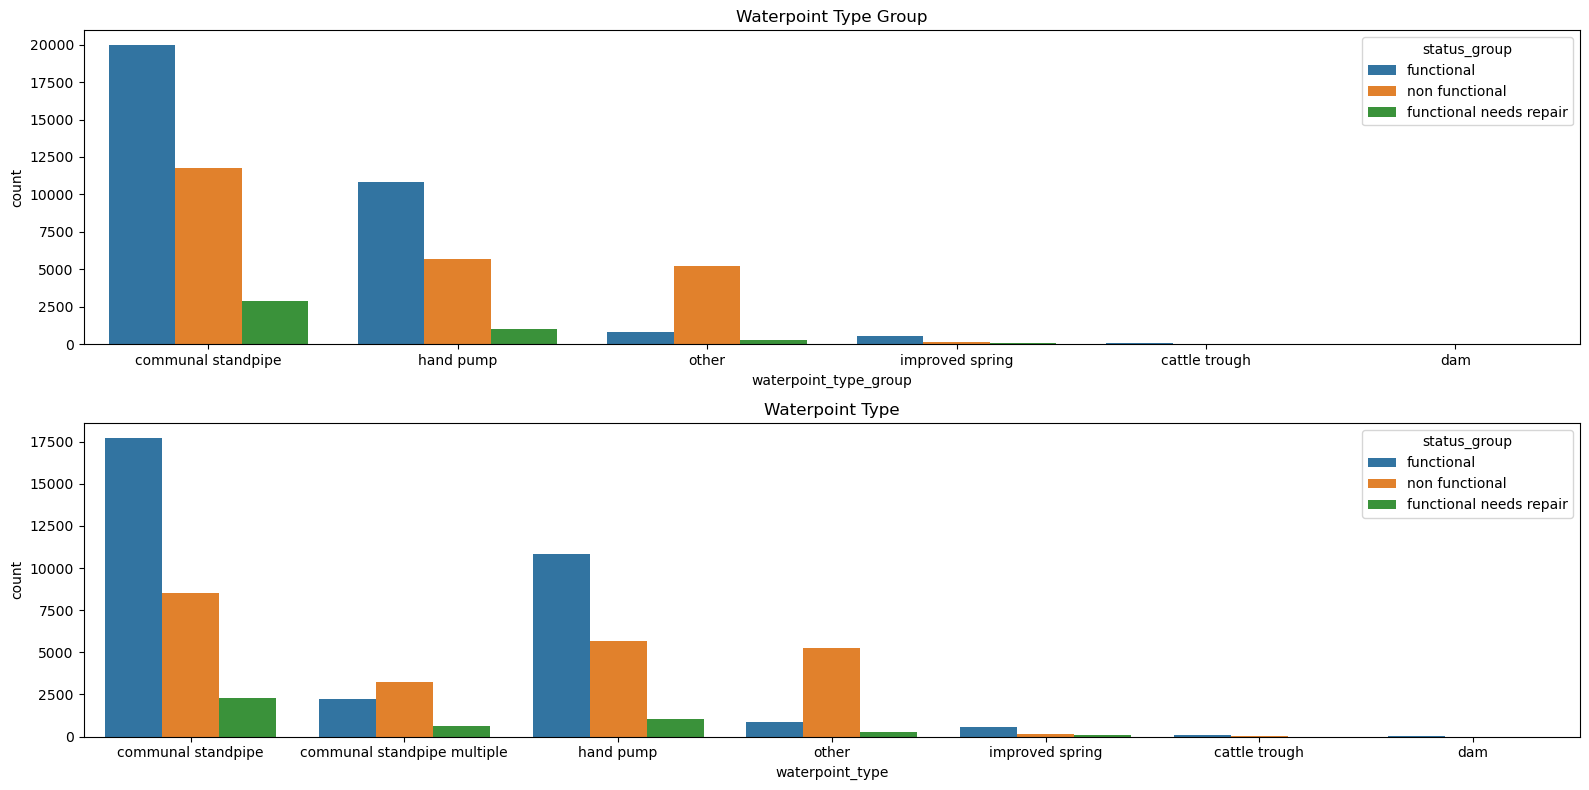

In [99]:
fig, ax = plt.subplots(2, 1, figsize=(16, 8))
sns.countplot(data=df_train_merged, x='waterpoint_type_group', hue='status_group', ax=ax[0])
ax[0].set_title('Waterpoint Type Group')
sns.countplot(data=df_train_merged, x='waterpoint_type', hue='status_group', ax=ax[1])
ax[1].set_title('Waterpoint Type')
plt.tight_layout()
plt.show()

#### Observation:
- waterpoint_type contains 7 unique value while waterpoint_type_group contains 6.
- The only difference is communal standpipe in waterpoint_type is further distributed into communal standpipe & communal standpipe multiple.
- communical standpipe multiple's has higher non functional count as compared to communal standpipe.

#### Actions:
- Select waterpoint_type_group over waterpoint_type.

## 3. Features' Bulk Visualization features against target value

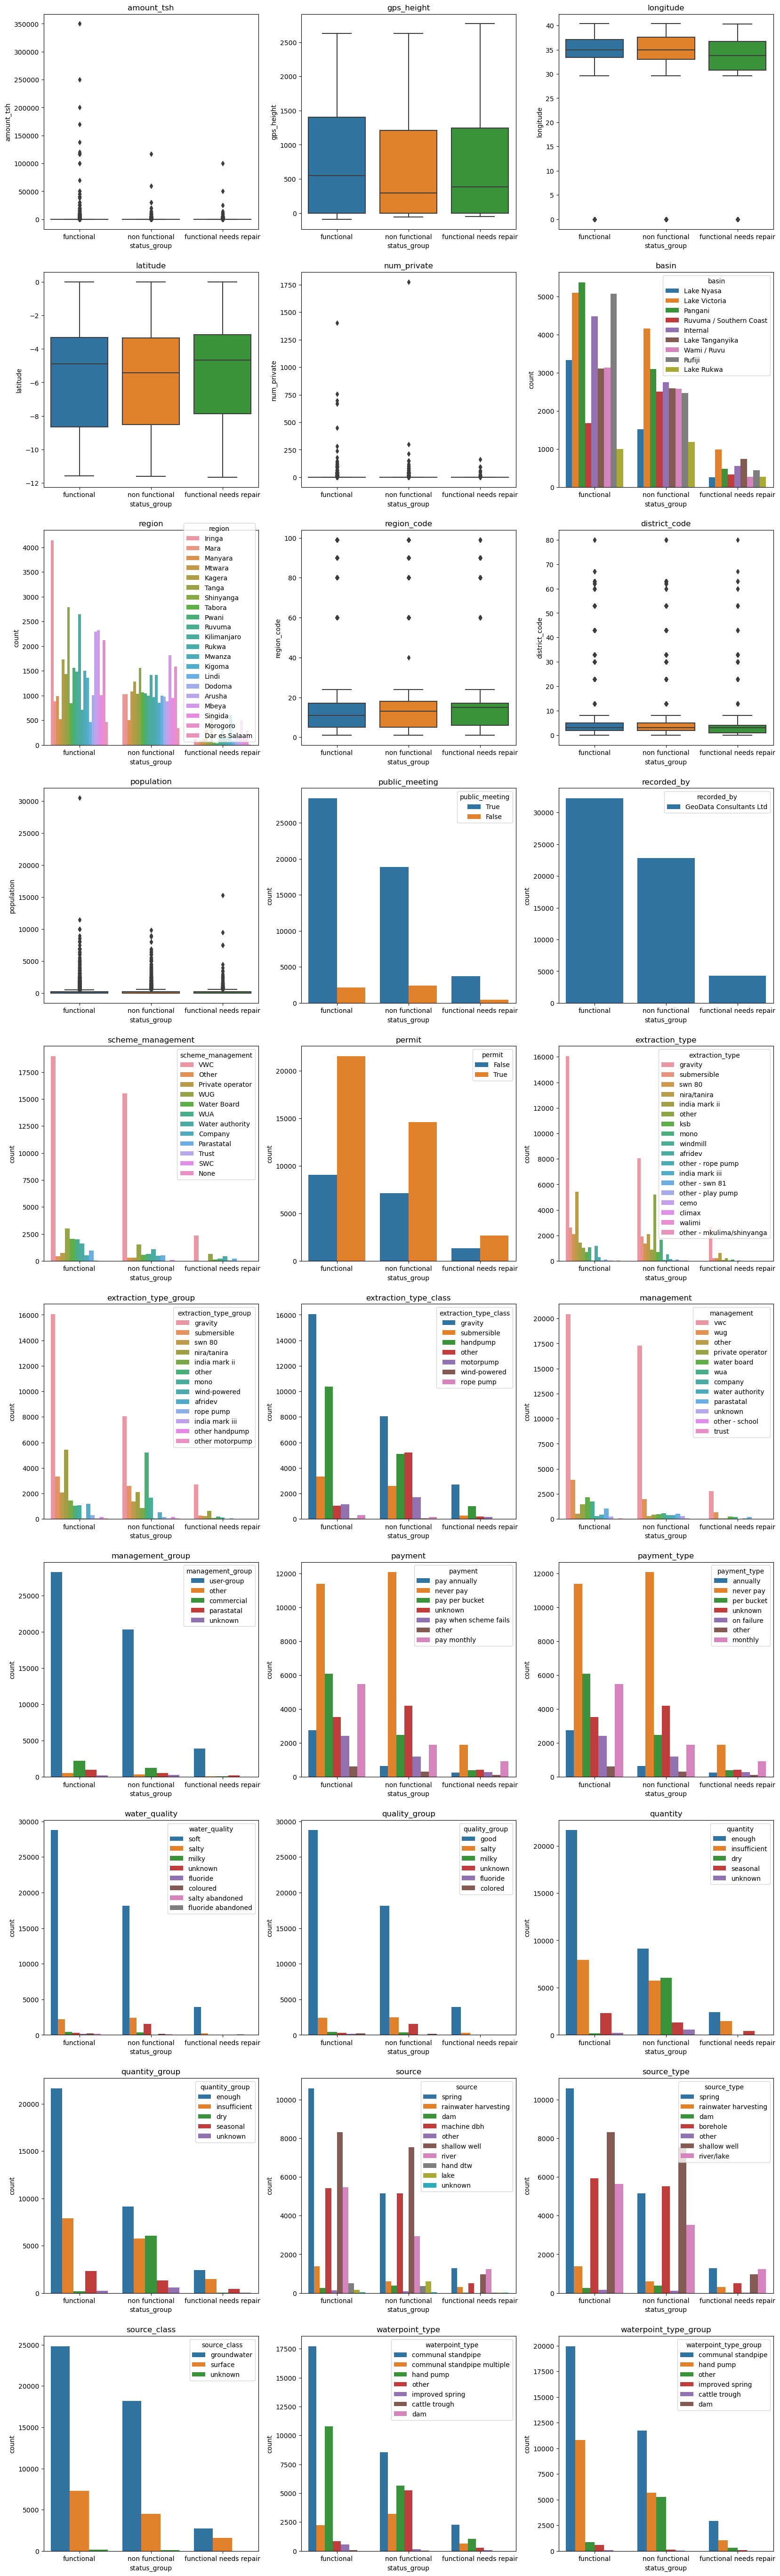

In [100]:
import math

excluded_columns = ['id', 'date_recorded', 'wpt_name', 'subvillage', 'installer', 'funder', 'lga', 'ward', 'scheme_name', 'construction_year', 'status_group']
included_columns_count = df_train_merged.shape[1] - len(excluded_columns)
num_column = 3
num_row = math.ceil(included_columns_count / num_column)
fig, ax = plt.subplots(num_row, num_column, figsize=(20, 70))
ax = ax.ravel()
count = 0

for column in df_train_merged.iloc[:, 1:-1]:
    if column in excluded_columns:
        continue;
    elif df_train_merged[column].dtype == 'float64' or df_train_merged[column].dtype == 'int64':
        sns.boxplot(data=df_train_merged, x='status_group', y=column, ax=ax[count])
        ax[count].set_title(column)
        count += 1
    elif df_train_merged[column].dtype == 'object':
        sns.countplot(data=df_train_merged, x='status_group', hue=column, ax=ax[count])
        ax[count].set_title(column)
        count += 1
    
plt.show()

## 4. Findings

Column to drop:
- amount_tsh ➝ at least 75% of the value is 0 and has outliers
- wpt_name ➝ Free text (high cadinality and most of the pump doesn't have a name)
- num_private ➝ 99% of the value is 0
- payment_type ➝ Identical column to payment
- recorded_by ➝ Only 1 value
- scheme_name ➝ 28166 missing values
- quantity_group ➝ Identical column to quantity

Hierachical Relationship (Top to bottom):
- source_class -> souce_type -> source
- management_group -> management
- region -> lga -> wards -> subvillage 
- extraction_type_class -> extration_type_group -> extraction_type

---
# <ins>Pre-processing / Data Cleanning</ins>